In [1]:
%cd "C:\Users\Rizvi\Desktop\Milestone_2"

C:\Users\Rizvi\Desktop\Milestone_2


C:\Users\Rizvi\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# **Imports**

In [2]:
from pathlib import Path
import random
import pandas as pd

In [ ]:
import os
import shutil
import pandas as pd

# Define paths
milestone_folder = "/content/drive/MyDrive/CSE428 Project/Milestone_2"
data_folder = os.path.join(milestone_folder, "data")
csv_folder = os.path.join(milestone_folder, "section2-group2")
global_images_folder = os.path.join(milestone_folder, "global_images")
global_annotations_folder = os.path.join(milestone_folder, "global_annotations")

# Create data folder if it doesn't exist
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Function to copy images and annotations
def copy_files(csv_file, src_images_folder, src_annotations_folder, dest_images_folder, dest_annotations_folder):
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    for index, row in df.iterrows():
        image_file = row[0]
        annotation_file = row[1]
        shutil.copy(os.path.join(src_images_folder, image_file), os.path.join(dest_images_folder, image_file))
        shutil.copy(os.path.join(src_annotations_folder, annotation_file), os.path.join(dest_annotations_folder, annotation_file))

# Create train, validation, and test folders
for folder in ["train", "validation", "test"]:
    folder_path = os.path.join(data_folder, folder)
    images_folder = os.path.join(folder_path, "images")
    annotations_folder = os.path.join(folder_path, "annotations")
    os.makedirs(images_folder, exist_ok=True)
    os.makedirs(annotations_folder, exist_ok=True)

# Copy files for train, validation, and test sets
copy_files("train.csv", global_images_folder, global_annotations_folder, os.path.join(data_folder, "train", "images"), os.path.join(data_folder, "train", "annotations"))
copy_files("val.csv", global_images_folder, global_annotations_folder, os.path.join(data_folder, "validation", "images"), os.path.join(data_folder, "validation", "annotations"))
copy_files("test.csv", global_images_folder, global_annotations_folder, os.path.join(data_folder, "test", "images"), os.path.join(data_folder, "test", "annotations"))

print("Folder structure created and files copied successfully.")


Folder structure created and files copied successfully.


In [ ]:
data_folder = "/content/drive/MyDrive/CSE428 Project/Milestone_2/data"

# Function to count files in a folder
def count_files(folder_path):
    num_files = len(os.listdir(folder_path))
    return num_files

# Function to count image and annotation files in train, validation, and test folders
def count_files_in_folders(data_folder):
    for folder in ["train", "validation", "test"]:
        images_folder = os.path.join(data_folder, folder, "images")
        annotations_folder = os.path.join(data_folder, folder, "annotations")
        num_images = count_files(images_folder)
        num_annotations = count_files(annotations_folder)
        print(f"Folder: {folder}")
        print(f"Number of image files: {num_images}")
        print(f"Number of annotation files: {num_annotations}")
        print()

# Count files in train, validation, and test folders
count_files_in_folders(data_folder)


Folder: train
Number of image files: 2531
Number of annotation files: 2531

Folder: validation
Number of image files: 723
Number of annotation files: 723

Folder: test
Number of image files: 362
Number of annotation files: 362



In [3]:
import torch
print(torch.cuda.is_available())

True


# **Install Model**

In [1]:
from IPython import display
display.clear_output()


Ultralytics YOLOv8.2.2  Python-3.12.2 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Setup complete  (16 CPUs, 31.9 GB RAM, 363.4/465.0 GB disk)


In [1]:

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.2.6  Python-3.11.4 torch-2.3.0+cpu CPU (Intel Core(TM) i5-8265U 1.60GHz)
Setup complete  (8 CPUs, 7.8 GB RAM, 113.5/237.8 GB disk)


In [2]:
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:25<00:00, 885kB/s] 


# **Training Dataset**

In [7]:
%cd "C:\Users\Rizvi\Desktop\Milestone_2"

#!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=100 imgsz=640 batch = 30 plots=True optimizer = Adam save=True device = 0

results = model.train(data= "data.yaml", epochs=100, imgsz=640, batch = 30, plots=True, save_period =1, save=True, device = 0)

C:\Users\Rizvi\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\Rizvi\Desktop\Milestone_2
New https://pypi.org/project/ultralytics/8.2.5 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.2  Python-3.12.2 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=30, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

train: Scanning C:\Users\Rizvi\Desktop\Milestone_2\data\labels\train... 2531 images, 23 backgrounds, 27 corrupt: 100%|██████████| 2531/2531 [00:03<00:00, 835.96it/s] 


train: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\train\20301114_3.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0013]
train: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\train\20301159_01.jpg: 3 duplicate labels removed
train: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\train\20301159_03.jpg: 4 duplicate labels removed
train: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\train\20301159_04.jpg: 5 duplicate labels removed
train: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\train\20301159_05.jpg: 4 duplicate labels removed
train: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\train\20301159_06.jpg: 5 duplicate labels removed
train: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\train\2961.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
train: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\ima

val: Scanning C:\Users\Rizvi\Desktop\Milestone_2\data\labels\val... 723 images, 2 backgrounds, 11 corrupt: 100%|██████████| 723/723 [00:01<00:00, 559.05it/s]

val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\24141199_23.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0022]
val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\2968.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\2970.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\2973.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\2980.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
val: WARNING  C:\Users\Rizvi\Deskt

val: New cache created: C:\Users\Rizvi\Desktop\Milestone_2\data\labels\val.cache
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.17G     0.8375      0.665      1.005         60        640: 100%|██████████| 84/84 [00:27<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]

                   all        712       1586      0.728      0.755       0.79      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.15G     0.8563     0.6905      1.014         71        640: 100%|██████████| 84/84 [00:19<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]

                   all        712       1586      0.718      0.752      0.774      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.16G     0.8668     0.6991      1.017         65        640: 100%|██████████| 84/84 [00:19<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]

                   all        712       1586      0.695      0.743      0.741      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.13G     0.8957     0.7466      1.039         60        640: 100%|██████████| 84/84 [00:19<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]

                   all        712       1586      0.725      0.709      0.764      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.16G     0.8897     0.7539      1.028         61        640: 100%|██████████| 84/84 [00:19<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]

                   all        712       1586      0.703      0.728      0.757      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.13G     0.8971     0.7433      1.038         53        640: 100%|██████████| 84/84 [00:18<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]

                   all        712       1586      0.703      0.734      0.758      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.12G     0.9057     0.7494      1.037         67        640: 100%|██████████| 84/84 [00:19<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]

                   all        712       1586      0.692      0.736      0.757      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.13G     0.8912     0.7442      1.039         78        640: 100%|██████████| 84/84 [00:19<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]

                   all        712       1586      0.712      0.732      0.745      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.12G     0.8841     0.7215      1.028         49        640: 100%|██████████| 84/84 [00:19<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]

                   all        712       1586      0.725      0.716      0.753      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       7.1G     0.8875     0.7435      1.028         67        640: 100%|██████████| 84/84 [00:19<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]

                   all        712       1586      0.697      0.747      0.748      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.17G      0.888     0.7232      1.031         55        640: 100%|██████████| 84/84 [00:19<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]

                   all        712       1586      0.731      0.745      0.775      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.11G     0.8823     0.7161      1.028         69        640: 100%|██████████| 84/84 [00:19<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.71it/s]

                   all        712       1586      0.722      0.748      0.759      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.09G     0.8872     0.7165      1.033         56        640: 100%|██████████| 84/84 [00:19<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.13it/s]

                   all        712       1586      0.677      0.771      0.761      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.13G     0.8724     0.6966      1.025         46        640: 100%|██████████| 84/84 [00:19<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]

                   all        712       1586      0.746      0.697      0.776      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.16G     0.8679     0.6975      1.021         88        640: 100%|██████████| 84/84 [00:19<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]

                   all        712       1586      0.703      0.757      0.762      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.12G     0.8684     0.7025      1.021         66        640: 100%|██████████| 84/84 [00:20<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.05it/s]

                   all        712       1586       0.75      0.714      0.768      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.16G     0.8595     0.6936      1.018         77        640: 100%|██████████| 84/84 [00:19<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.87it/s]

                   all        712       1586      0.691      0.756      0.752      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.16G     0.8564     0.6924      1.018         69        640: 100%|██████████| 84/84 [00:19<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.06it/s]

                   all        712       1586      0.739      0.721      0.775      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.12G     0.8657     0.6803      1.019         65        640: 100%|██████████| 84/84 [00:19<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]

                   all        712       1586      0.737      0.736      0.772       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.12G     0.8443     0.6755      1.008         67        640: 100%|██████████| 84/84 [00:19<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.95it/s]

                   all        712       1586      0.724      0.756      0.773      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.16G       0.85     0.6579      1.009         68        640: 100%|██████████| 84/84 [00:19<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]

                   all        712       1586      0.703      0.755      0.777      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.16G     0.8357      0.657     0.9987         48        640: 100%|██████████| 84/84 [00:20<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]

                   all        712       1586      0.717      0.736      0.765      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.15G      0.834     0.6606      1.004         46        640: 100%|██████████| 84/84 [00:19<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]

                   all        712       1586      0.714      0.757      0.775      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.15G     0.8275     0.6494      1.001         72        640: 100%|██████████| 84/84 [00:19<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]

                   all        712       1586      0.722      0.744      0.755      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.12G     0.8246     0.6419     0.9961         69        640: 100%|██████████| 84/84 [00:19<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.04it/s]

                   all        712       1586       0.72      0.728      0.765       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.08G     0.8217     0.6293     0.9951         54        640: 100%|██████████| 84/84 [00:19<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.00it/s]

                   all        712       1586      0.698      0.744      0.735      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.12G     0.8084     0.6311     0.9972         43        640: 100%|██████████| 84/84 [00:19<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]

                   all        712       1586      0.728       0.71      0.755      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.15G     0.8166     0.6233     0.9949         54        640: 100%|██████████| 84/84 [00:20<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  3.00it/s]

                   all        712       1586      0.743      0.732      0.775      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.16G     0.7997     0.6047     0.9877         52        640: 100%|██████████| 84/84 [00:19<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.68it/s]

                   all        712       1586      0.743      0.712      0.751      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.15G      0.803     0.6016     0.9907         60        640: 100%|██████████| 84/84 [00:20<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]

                   all        712       1586      0.743      0.723      0.762      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.11G     0.7873     0.5946     0.9842         54        640: 100%|██████████| 84/84 [00:20<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.76it/s]

                   all        712       1586      0.726      0.717      0.755      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.12G     0.8012     0.5999     0.9904         67        640: 100%|██████████| 84/84 [00:20<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.09it/s]

                   all        712       1586      0.747      0.712      0.773      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.12G      0.789     0.5953     0.9863         44        640: 100%|██████████| 84/84 [00:19<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.90it/s]

                   all        712       1586      0.718      0.757      0.772      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.12G     0.7779     0.5743     0.9797         76        640: 100%|██████████| 84/84 [00:20<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.84it/s]

                   all        712       1586      0.716      0.742      0.765      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.12G     0.7896     0.5827     0.9842         63        640: 100%|██████████| 84/84 [00:20<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]

                   all        712       1586      0.734       0.74      0.778      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.12G     0.7826     0.5663     0.9832         89        640: 100%|██████████| 84/84 [00:21<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.80it/s]

                   all        712       1586      0.746       0.73      0.776      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       7.1G      0.772     0.5695     0.9751         81        640: 100%|██████████| 84/84 [00:20<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.78it/s]

                   all        712       1586      0.732      0.736       0.76      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.12G     0.7717     0.5684     0.9784         65        640: 100%|██████████| 84/84 [00:19<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]

                   all        712       1586      0.708      0.746      0.756      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.07G     0.7658     0.5514     0.9699         83        640: 100%|██████████| 84/84 [00:20<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        712       1586      0.717      0.754      0.757      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.15G     0.7545     0.5494     0.9677         65        640: 100%|██████████| 84/84 [00:21<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.89it/s]

                   all        712       1586      0.718      0.703      0.743      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.08G     0.7552     0.5477     0.9627         58        640: 100%|██████████| 84/84 [00:20<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.78it/s]

                   all        712       1586      0.734      0.732      0.753      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.12G     0.7484      0.535     0.9669         57        640: 100%|██████████| 84/84 [00:20<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]

                   all        712       1586      0.734      0.716      0.765      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.12G     0.7544     0.5525     0.9634         78        640: 100%|██████████| 84/84 [00:20<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]

                   all        712       1586      0.717      0.757      0.746      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.15G     0.7453     0.5294     0.9608         63        640: 100%|██████████| 84/84 [00:20<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.99it/s]

                   all        712       1586      0.721      0.738      0.751      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.12G     0.7459     0.5328     0.9611         68        640: 100%|██████████| 84/84 [00:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]

                   all        712       1586      0.722      0.749      0.767      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.15G     0.7284     0.5287     0.9593         59        640: 100%|██████████| 84/84 [00:19<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]

                   all        712       1586      0.735      0.755      0.771      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.15G     0.7459     0.5316     0.9605         55        640: 100%|██████████| 84/84 [00:19<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]

                   all        712       1586      0.719      0.757      0.759      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.16G     0.7391     0.5297     0.9596         74        640: 100%|██████████| 84/84 [00:20<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]

                   all        712       1586      0.752      0.719      0.762      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.16G     0.7311     0.5243     0.9593         46        640: 100%|██████████| 84/84 [00:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.79it/s]

                   all        712       1586      0.726      0.727      0.761      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.16G     0.7275     0.5135     0.9577         63        640: 100%|██████████| 84/84 [00:20<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.90it/s]

                   all        712       1586      0.729      0.734      0.761      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.11G     0.7256      0.505     0.9552         78        640: 100%|██████████| 84/84 [00:20<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  3.00it/s]

                   all        712       1586      0.739      0.733      0.766      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.16G     0.7178     0.4976     0.9506         51        640: 100%|██████████| 84/84 [00:20<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.83it/s]

                   all        712       1586      0.746      0.741      0.776      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.12G     0.7192     0.5026     0.9561         88        640: 100%|██████████| 84/84 [00:20<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  3.00it/s]

                   all        712       1586      0.712      0.745      0.761      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       7.1G     0.7155     0.4989     0.9524         62        640: 100%|██████████| 84/84 [00:20<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.81it/s]

                   all        712       1586       0.72      0.749      0.762       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.11G     0.7075     0.4794     0.9472         58        640: 100%|██████████| 84/84 [00:20<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.93it/s]

                   all        712       1586      0.745      0.722      0.773      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.15G     0.6957      0.484     0.9495         46        640: 100%|██████████| 84/84 [00:20<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.95it/s]

                   all        712       1586      0.694      0.755      0.737      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.11G     0.6963     0.4895     0.9523         60        640: 100%|██████████| 84/84 [00:20<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]

                   all        712       1586      0.749      0.699      0.751      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.11G     0.6904     0.4786     0.9401         83        640: 100%|██████████| 84/84 [00:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.86it/s]

                   all        712       1586      0.749       0.72      0.758       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.16G     0.6931     0.4716     0.9451         85        640: 100%|██████████| 84/84 [00:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.05it/s]

                   all        712       1586      0.708      0.772      0.762      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.08G     0.6799     0.4708     0.9352         60        640: 100%|██████████| 84/84 [00:21<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]

                   all        712       1586      0.746      0.752      0.769      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.07G     0.6798      0.466     0.9353         83        640: 100%|██████████| 84/84 [00:21<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]

                   all        712       1586      0.726      0.751      0.767      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.16G     0.6746     0.4611     0.9346         62        640: 100%|██████████| 84/84 [00:21<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.86it/s]

                   all        712       1586      0.748      0.731      0.768      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.16G      0.672     0.4497     0.9327         58        640: 100%|██████████| 84/84 [00:21<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.84it/s]

                   all        712       1586      0.742      0.754      0.766      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.12G     0.6667     0.4566     0.9336         72        640: 100%|██████████| 84/84 [00:20<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.93it/s]

                   all        712       1586      0.713      0.755      0.747      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.09G     0.6596     0.4507     0.9291         82        640: 100%|██████████| 84/84 [00:20<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.74it/s]

                   all        712       1586      0.728      0.754       0.76      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.17G     0.6628     0.4436      0.933         71        640: 100%|██████████| 84/84 [00:20<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.84it/s]

                   all        712       1586      0.743      0.721      0.752       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.17G      0.654     0.4417     0.9224         82        640: 100%|██████████| 84/84 [00:21<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]

                   all        712       1586      0.729      0.746      0.761      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.11G     0.6549     0.4359     0.9329         60        640: 100%|██████████| 84/84 [00:21<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.65it/s]

                   all        712       1586      0.711       0.77      0.757      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.09G       0.65     0.4384     0.9259         50        640: 100%|██████████| 84/84 [00:20<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.94it/s]

                   all        712       1586      0.722      0.728      0.761      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.16G     0.6451     0.4327     0.9267         50        640: 100%|██████████| 84/84 [00:19<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.86it/s]

                   all        712       1586      0.697      0.752       0.75      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.17G     0.6339     0.4208     0.9208         68        640: 100%|██████████| 84/84 [00:20<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.90it/s]

                   all        712       1586      0.717      0.759      0.753       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.17G     0.6396     0.4293     0.9255         68        640: 100%|██████████| 84/84 [00:19<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]

                   all        712       1586      0.711      0.765      0.762      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.12G     0.6232     0.4141     0.9124         63        640: 100%|██████████| 84/84 [00:18<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]

                   all        712       1586      0.718      0.769       0.76      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.11G     0.6377     0.4207     0.9199         65        640: 100%|██████████| 84/84 [00:18<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]

                   all        712       1586      0.732      0.735      0.763      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.15G     0.6243     0.4085     0.9205         65        640: 100%|██████████| 84/84 [00:19<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]

                   all        712       1586       0.73      0.745      0.759      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.12G     0.6176     0.4055     0.9181         52        640: 100%|██████████| 84/84 [00:18<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]

                   all        712       1586      0.725      0.734       0.75      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.11G     0.6156     0.4073     0.9111         68        640: 100%|██████████| 84/84 [00:18<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]

                   all        712       1586      0.722      0.752      0.753      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.11G     0.6175     0.4054      0.918         60        640: 100%|██████████| 84/84 [00:19<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]

                   all        712       1586      0.748      0.729      0.759      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.12G     0.6118     0.4035     0.9157         65        640: 100%|██████████| 84/84 [00:18<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]

                   all        712       1586      0.694      0.778      0.759      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       7.1G      0.608     0.3998     0.9147         72        640: 100%|██████████| 84/84 [00:18<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]

                   all        712       1586      0.728      0.751      0.756      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.12G     0.5985     0.3889     0.9085         59        640: 100%|██████████| 84/84 [00:19<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]

                   all        712       1586      0.724       0.74      0.759      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.08G     0.5945     0.3892      0.909         80        640: 100%|██████████| 84/84 [00:18<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]

                   all        712       1586      0.731       0.73      0.751      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.16G     0.5949     0.3874     0.9055         63        640: 100%|██████████| 84/84 [00:19<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]

                   all        712       1586      0.734      0.733      0.757      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.11G     0.5872     0.3776     0.9034         80        640: 100%|██████████| 84/84 [00:18<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]

                   all        712       1586       0.71      0.761      0.759      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.12G     0.5808     0.3789     0.9063         56        640: 100%|██████████| 84/84 [00:18<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]

                   all        712       1586      0.742      0.734      0.757      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.15G     0.5858      0.381     0.9051         87        640: 100%|██████████| 84/84 [00:18<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.24it/s]

                   all        712       1586      0.762      0.724      0.764       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.16G     0.5869     0.3805     0.9095         52        640: 100%|██████████| 84/84 [00:18<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]

                   all        712       1586       0.71      0.757      0.752      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.16G     0.5817     0.3776      0.902         71        640: 100%|██████████| 84/84 [00:18<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]

                   all        712       1586      0.722      0.748      0.752       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.12G     0.5718      0.371     0.9003         71        640: 100%|██████████| 84/84 [00:18<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]

                   all        712       1586      0.724      0.752      0.757      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       7.1G      0.572     0.3697     0.9006         65        640: 100%|██████████| 84/84 [00:18<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]

                   all        712       1586      0.759       0.72       0.76      0.578


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.07G     0.5559     0.3624       0.88         26        640: 100%|██████████| 84/84 [00:20<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]

                   all        712       1586      0.762      0.717      0.757      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.07G     0.5235     0.3216     0.8685         26        640: 100%|██████████| 84/84 [00:18<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]

                   all        712       1586      0.709      0.765      0.755       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.11G     0.5153     0.3073     0.8635         42        640: 100%|██████████| 84/84 [00:18<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]

                   all        712       1586      0.736      0.745      0.763      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.07G     0.5075     0.3048     0.8628         20        640: 100%|██████████| 84/84 [00:18<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]

                   all        712       1586      0.721      0.755       0.76      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.11G     0.4956     0.2945     0.8606         29        640: 100%|██████████| 84/84 [00:18<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]

                   all        712       1586      0.734      0.739      0.761       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.07G     0.4995     0.2969     0.8608         47        640: 100%|██████████| 84/84 [00:18<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]

                   all        712       1586      0.724       0.75      0.764      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.07G     0.4884     0.2934     0.8615         26        640: 100%|██████████| 84/84 [00:18<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]

                   all        712       1586       0.74      0.735      0.762      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.07G     0.4854     0.2858     0.8604         32        640: 100%|██████████| 84/84 [00:18<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]

                   all        712       1586      0.759      0.722      0.763      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.07G     0.4812     0.2857     0.8541         40        640: 100%|██████████| 84/84 [00:18<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]

                   all        712       1586       0.73      0.749      0.764      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.07G     0.4817     0.2845      0.857         44        640: 100%|██████████| 84/84 [00:18<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]

                   all        712       1586       0.75      0.724      0.764      0.584



100 epochs completed in 0.699 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 22.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.2  Python-3.12.2 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.72it/s]


                   all        712       1586      0.727      0.755       0.79      0.594
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train


In [ ]:
#!ls runs/detect/train/

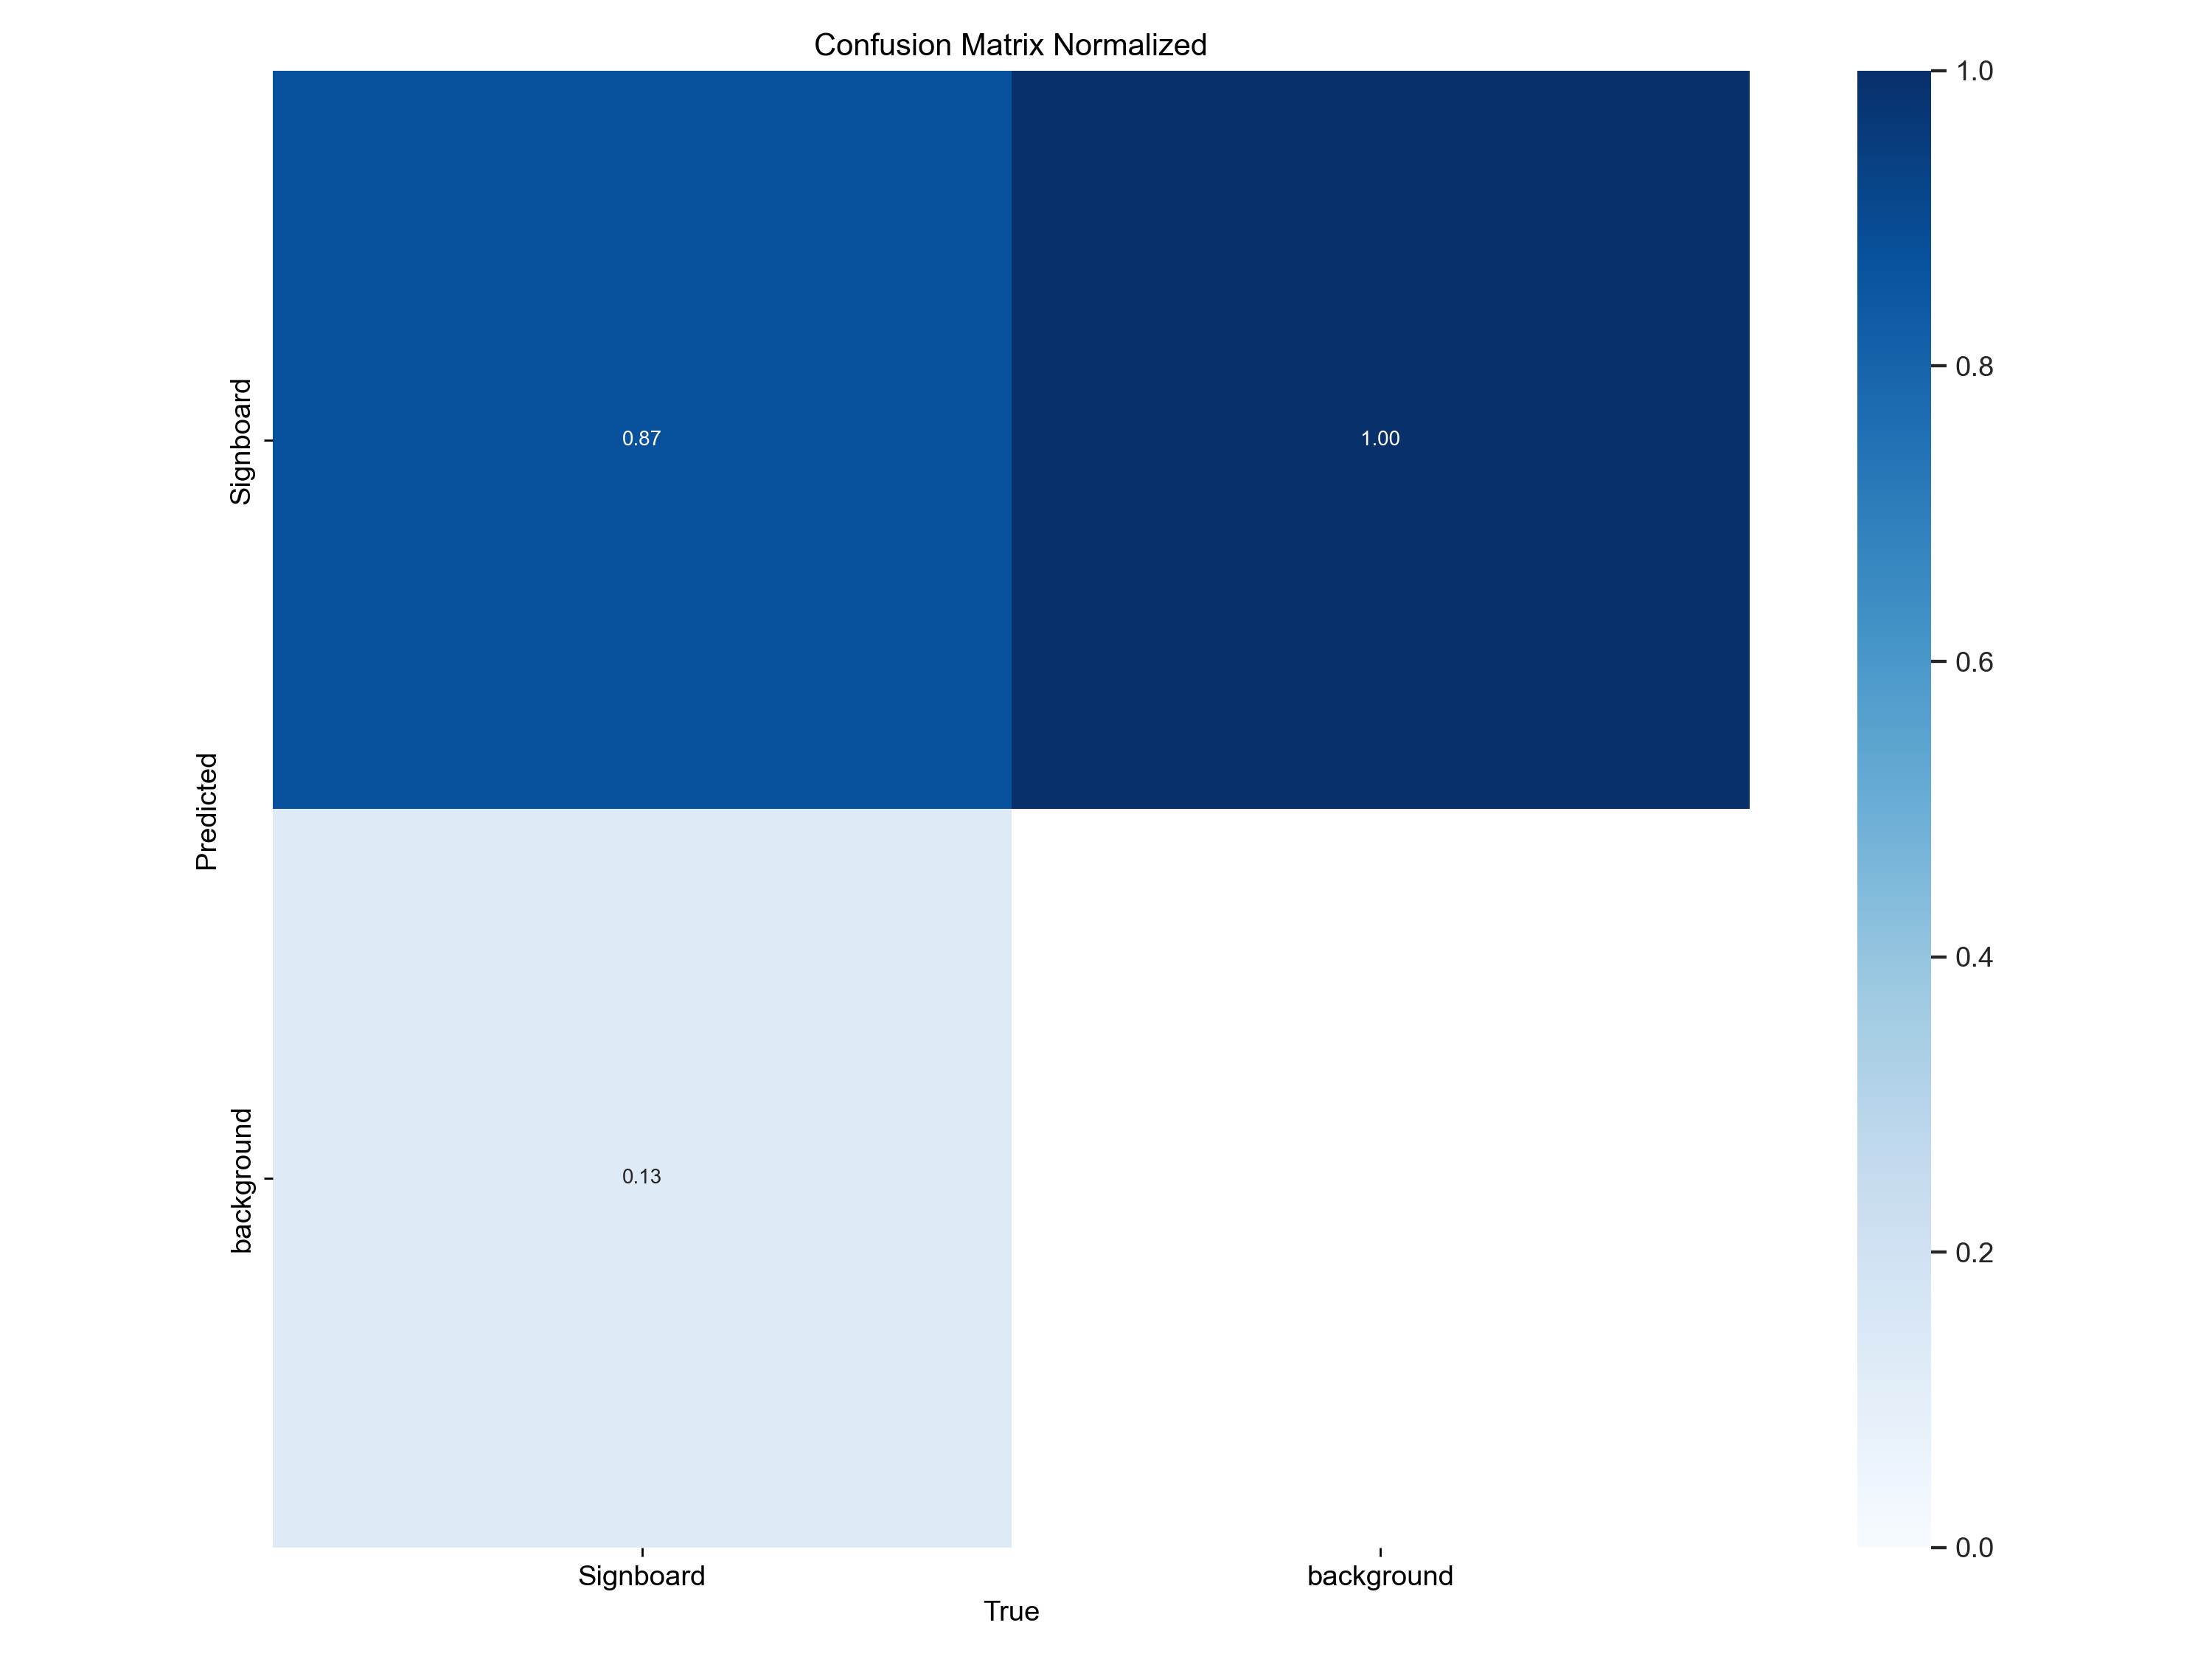

In [8]:
from IPython.display import display, Image
Image(filename='runs/detect/train/confusion_matrix_normalized.png', width=1000)

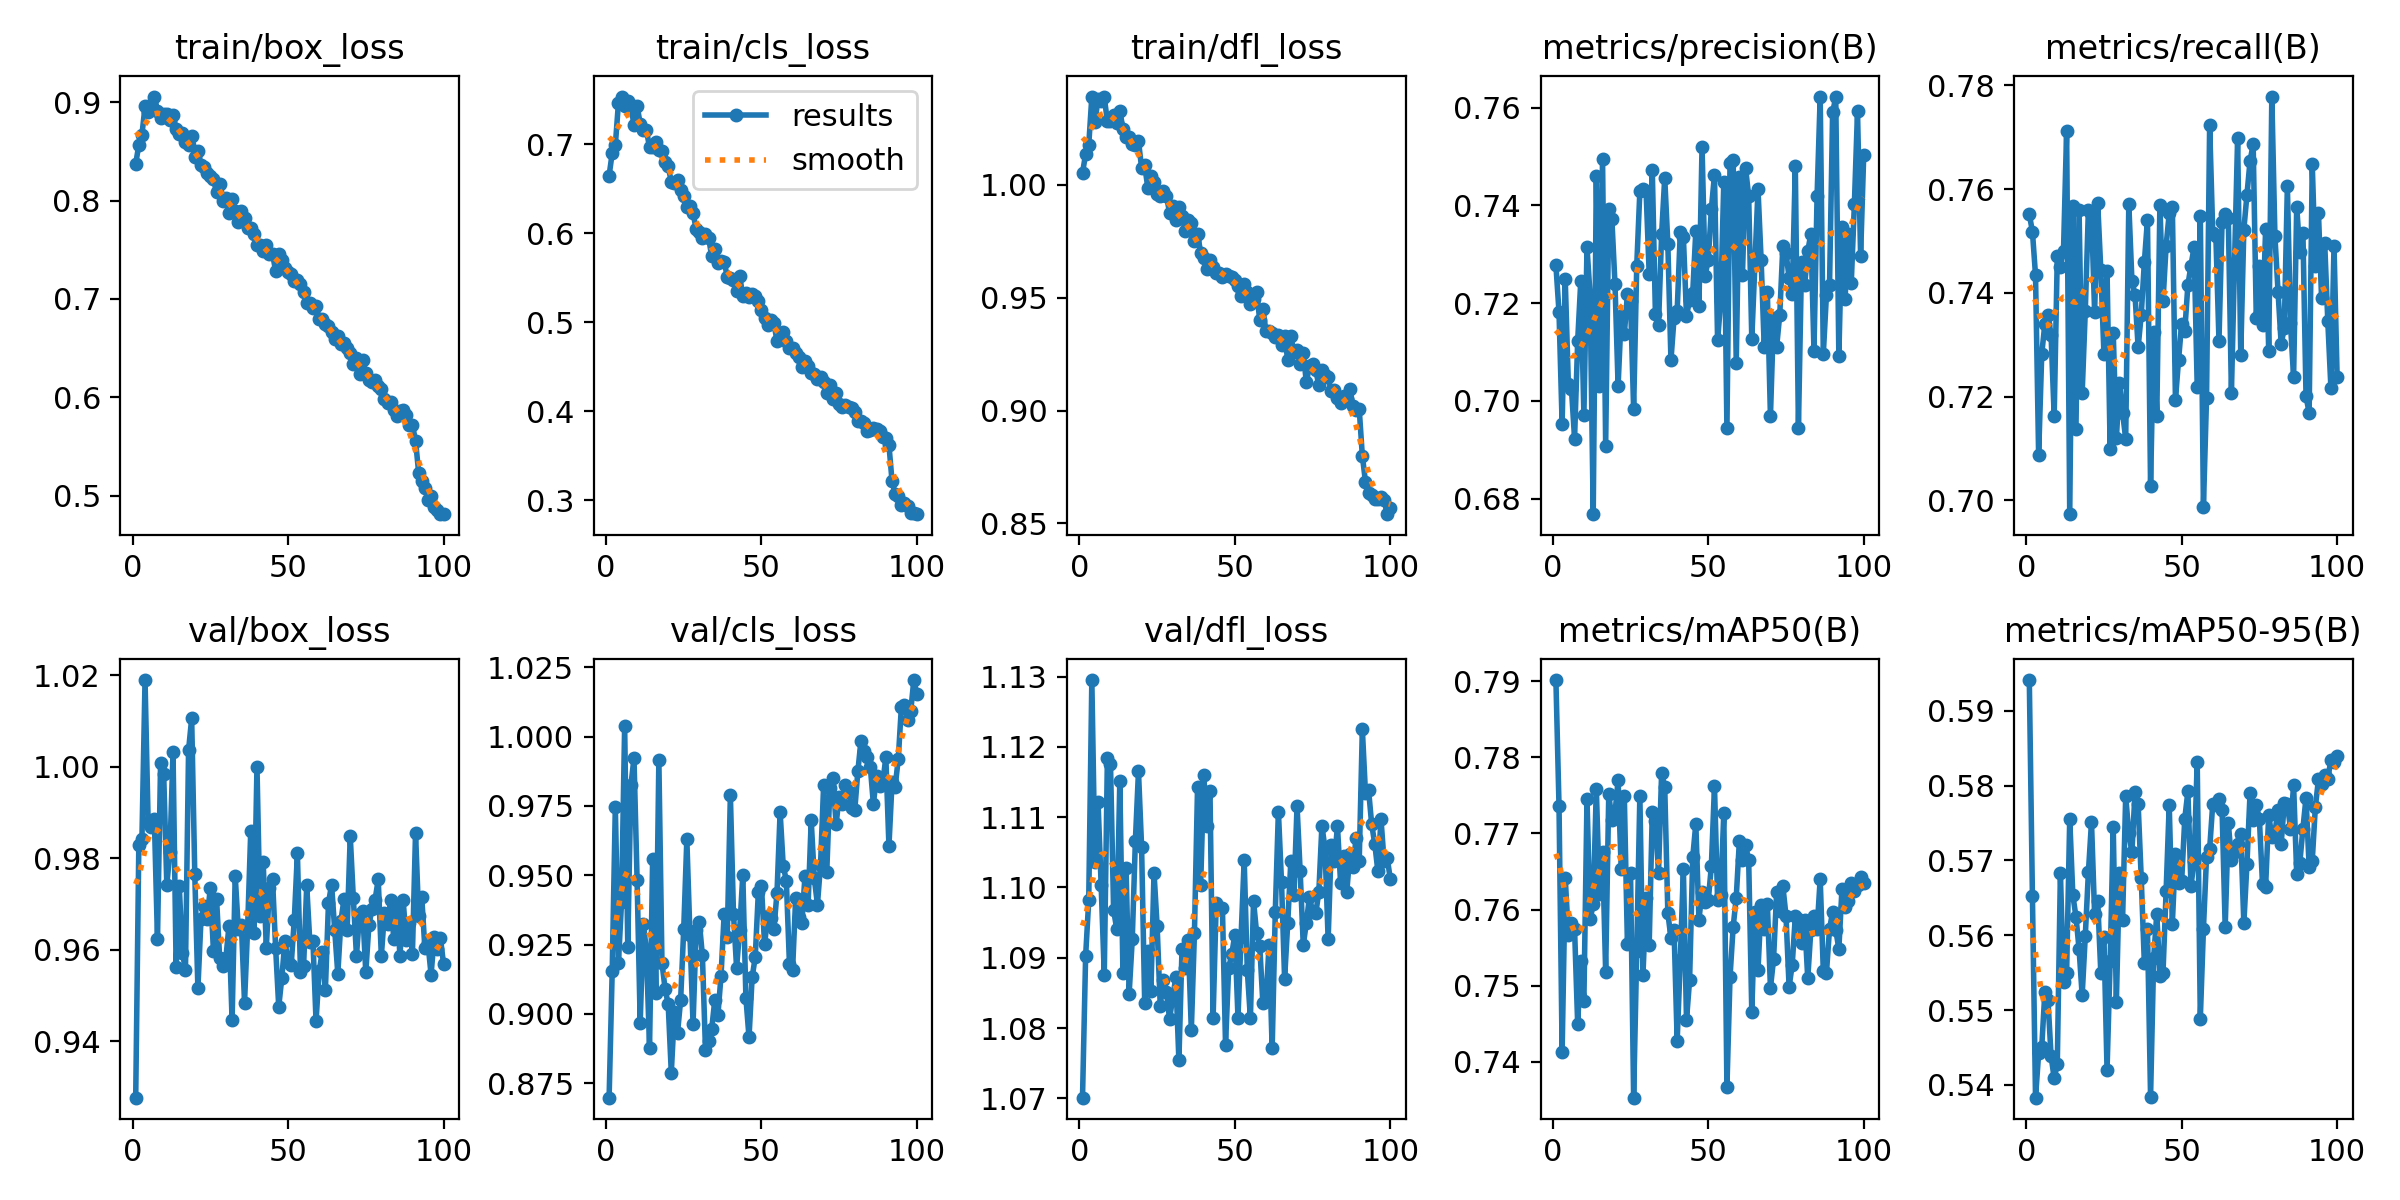

In [9]:
Image(filename='runs/detect/train/results.png', width=1000)

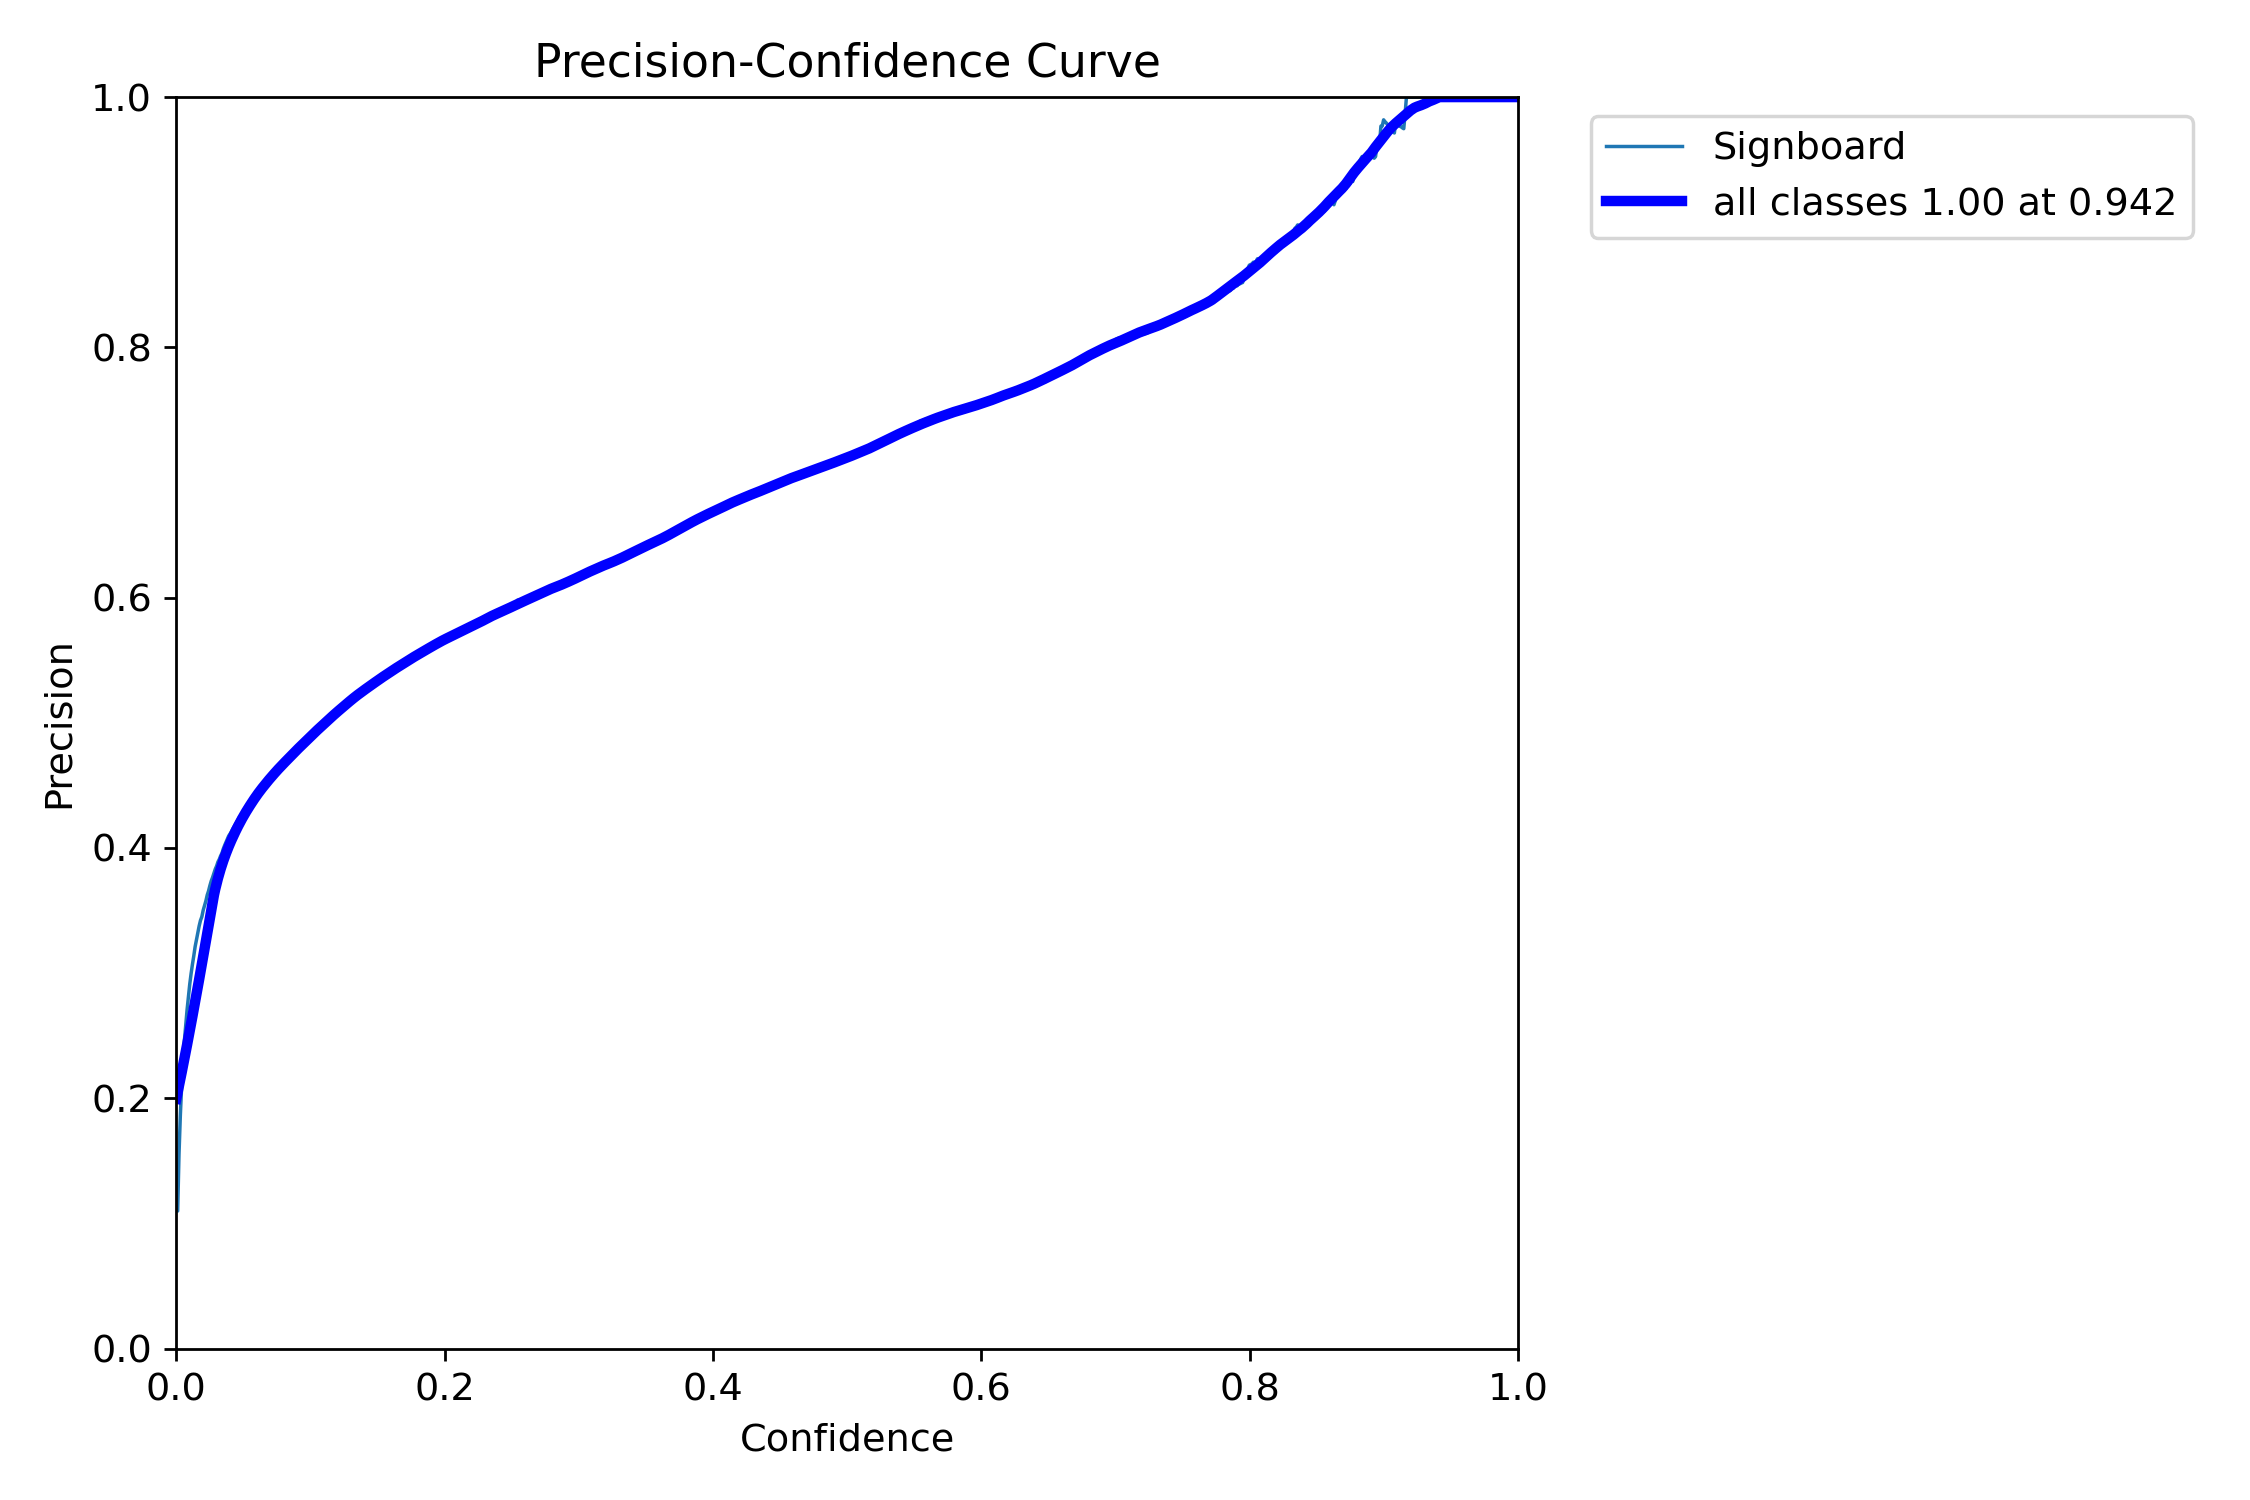

In [10]:
Image(filename='runs/detect/train/P_curve.png', width=1000)

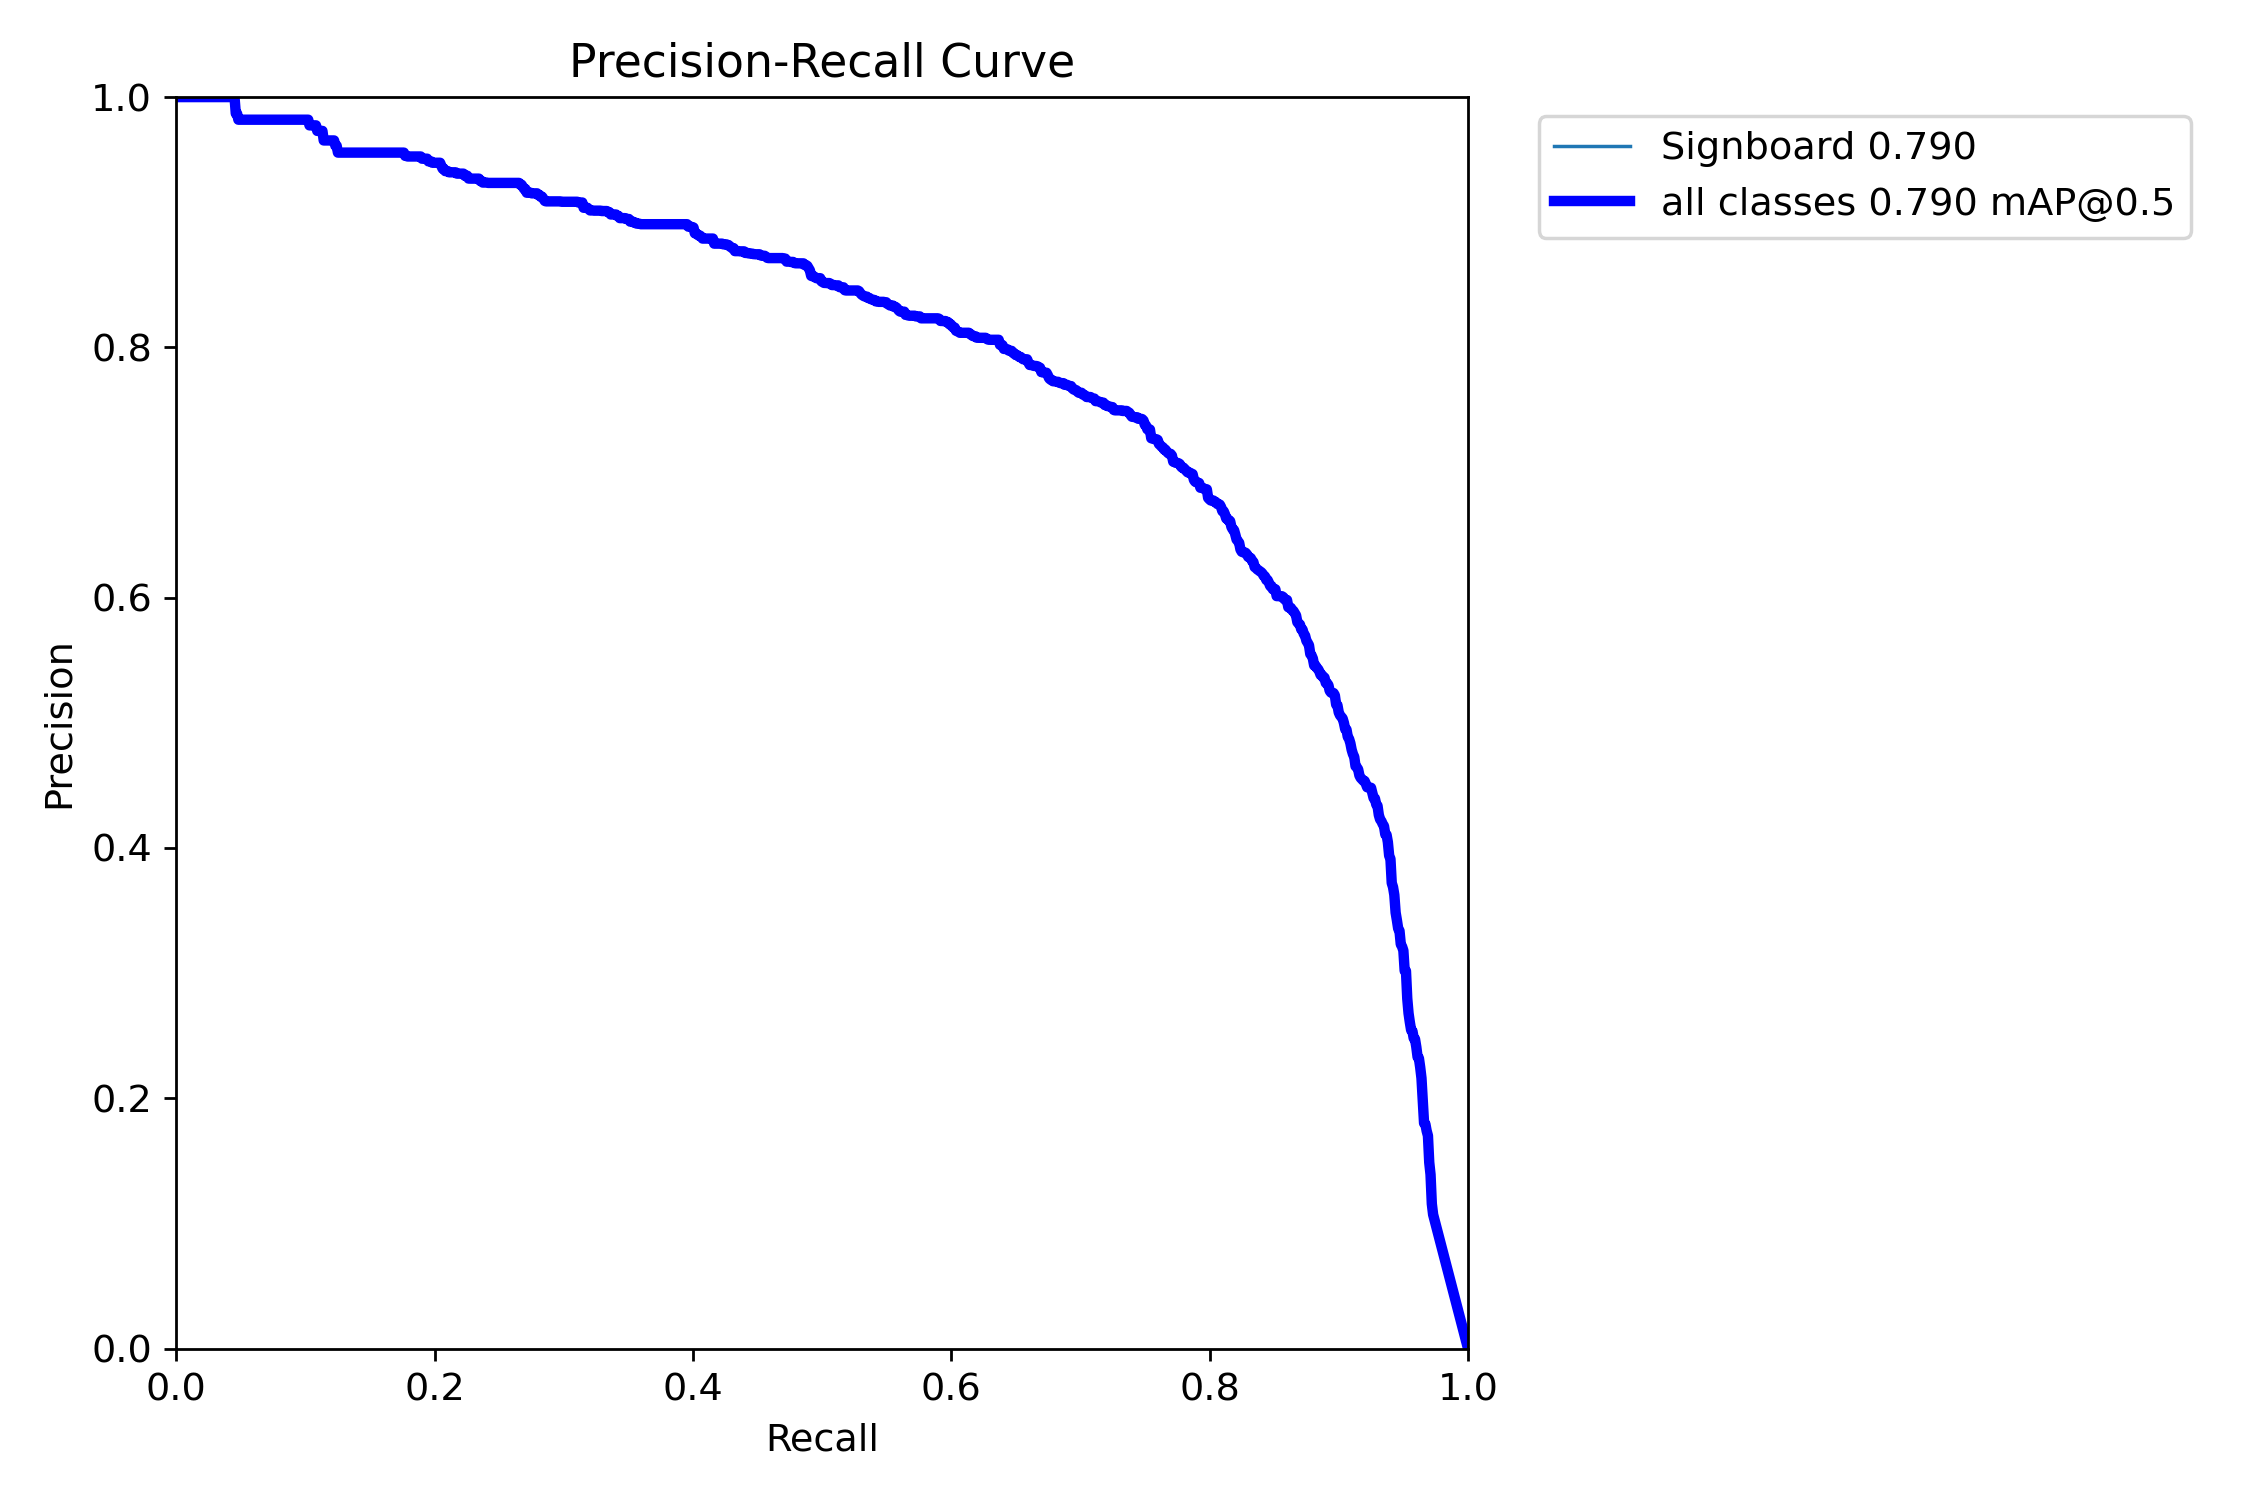

In [11]:
Image(filename='runs/detect/train/PR_curve.png', width=1000)

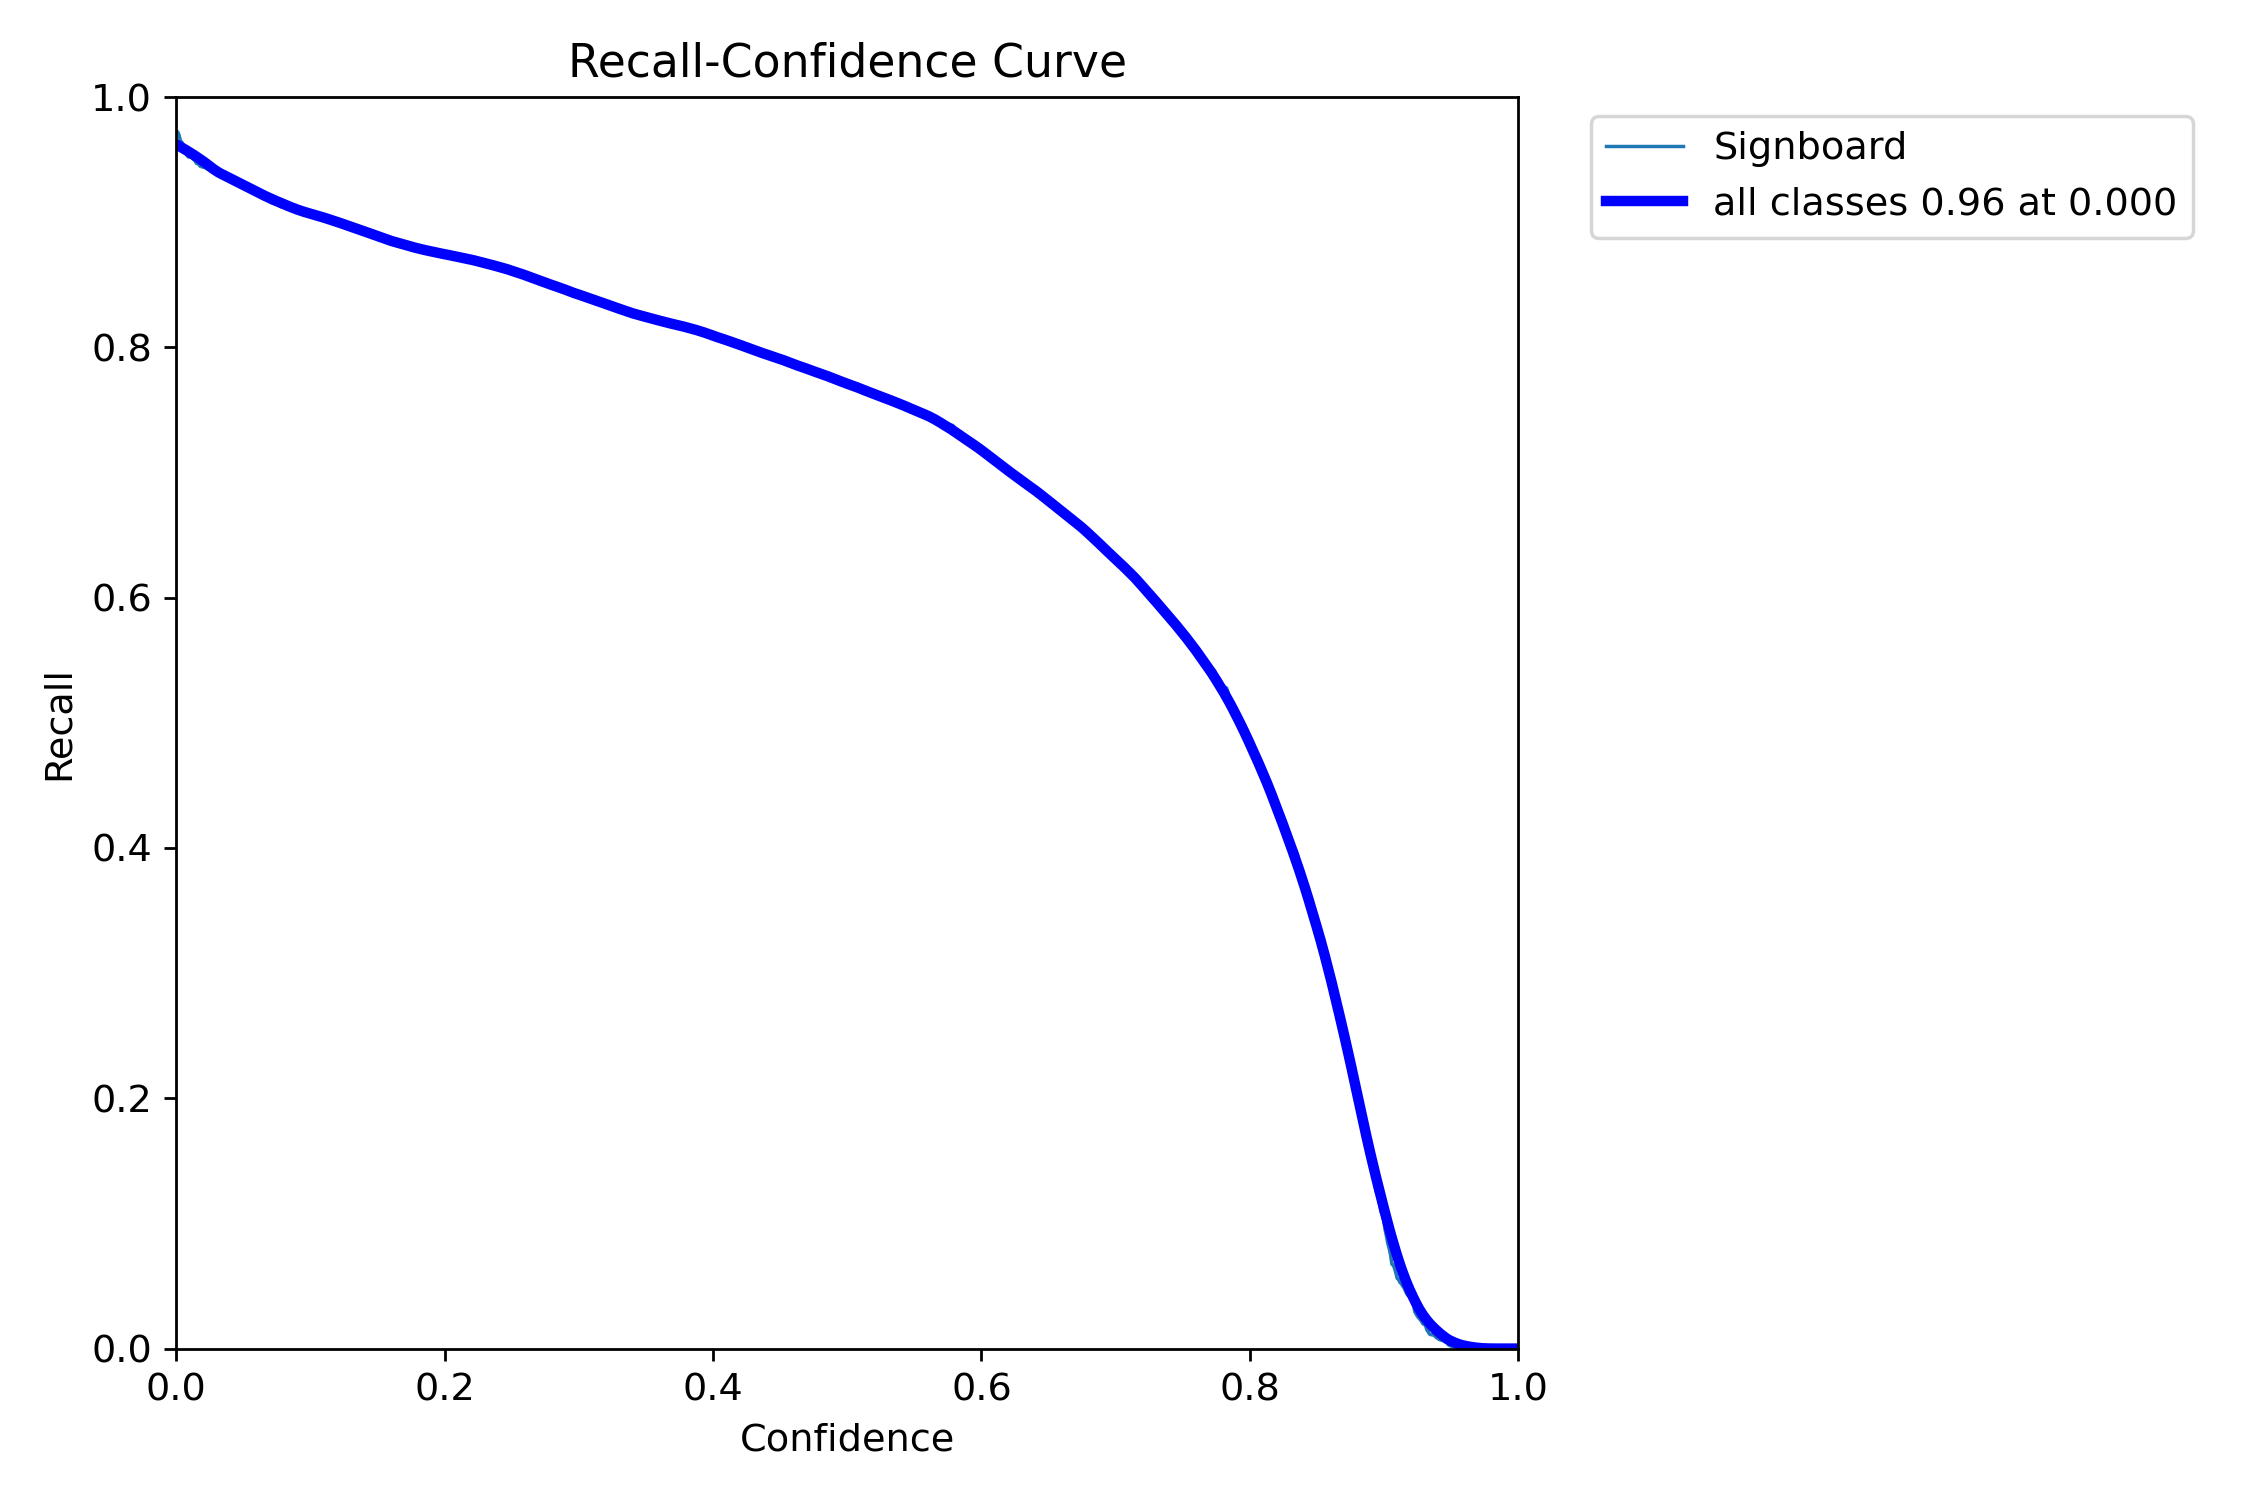

In [12]:
Image(filename='runs/detect/train/R_curve.png', width=1000)

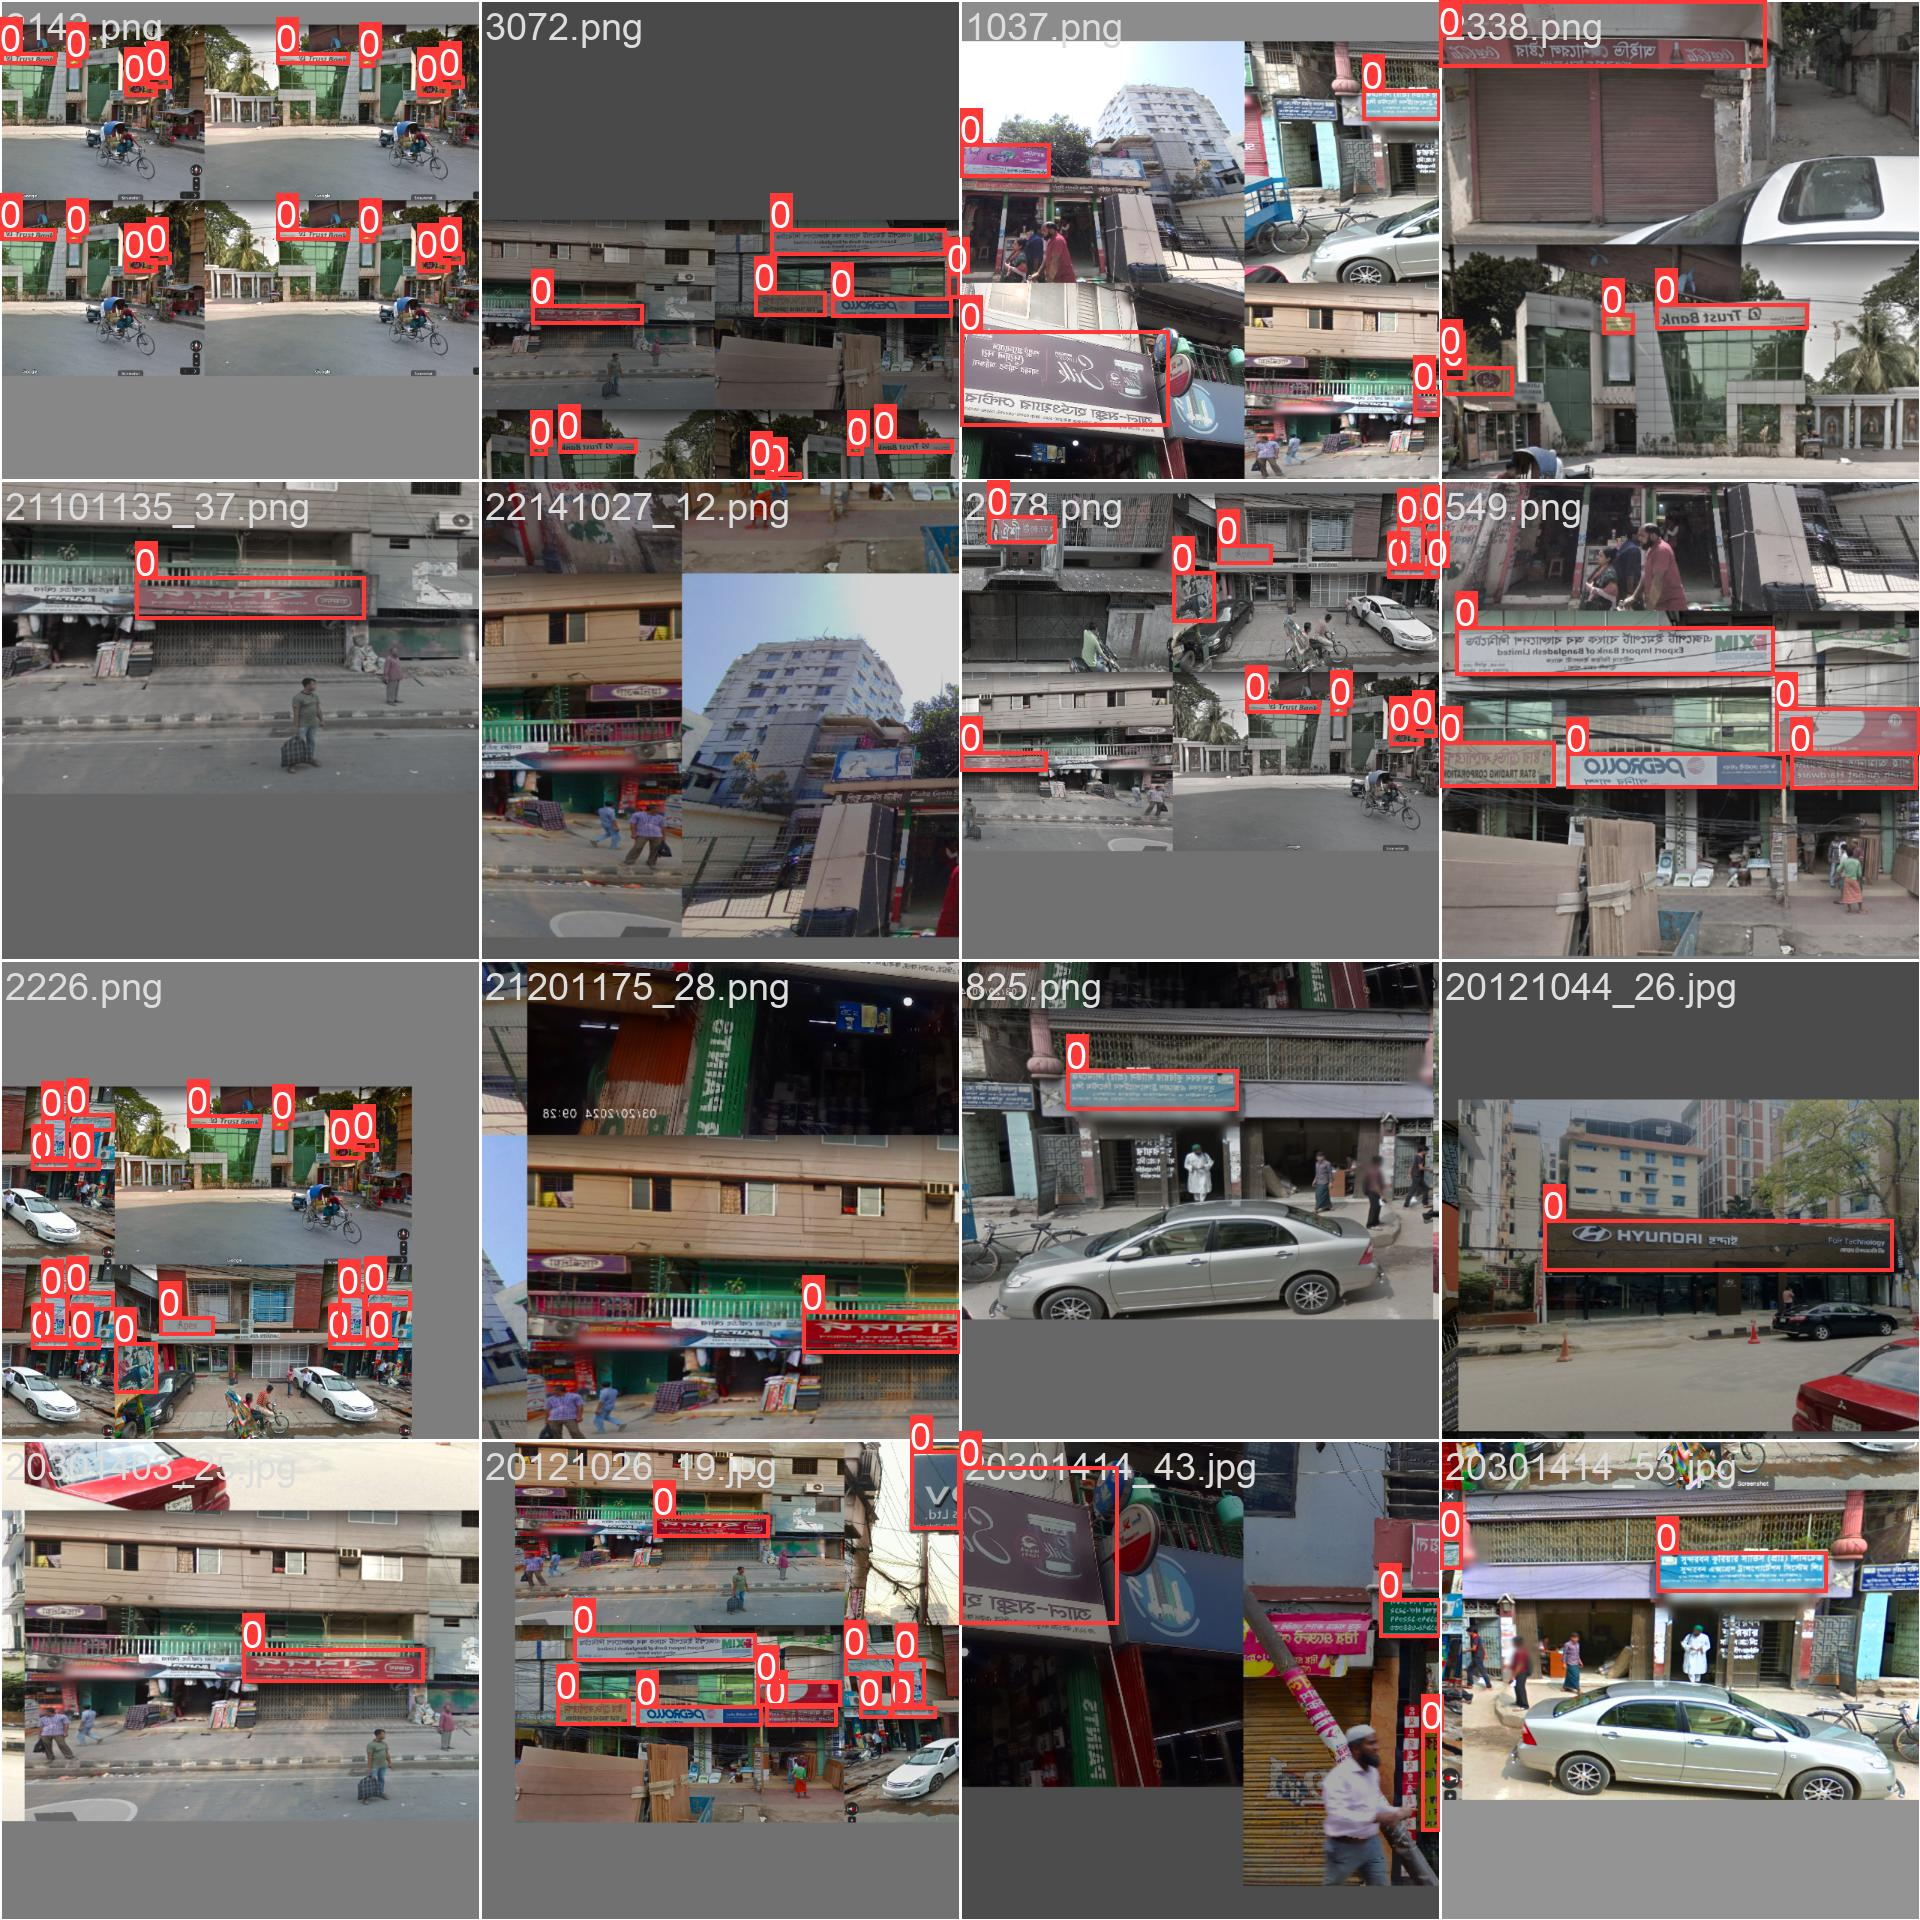

In [13]:
Image(filename='runs/detect/train/train_batch0.jpg', width=1000)

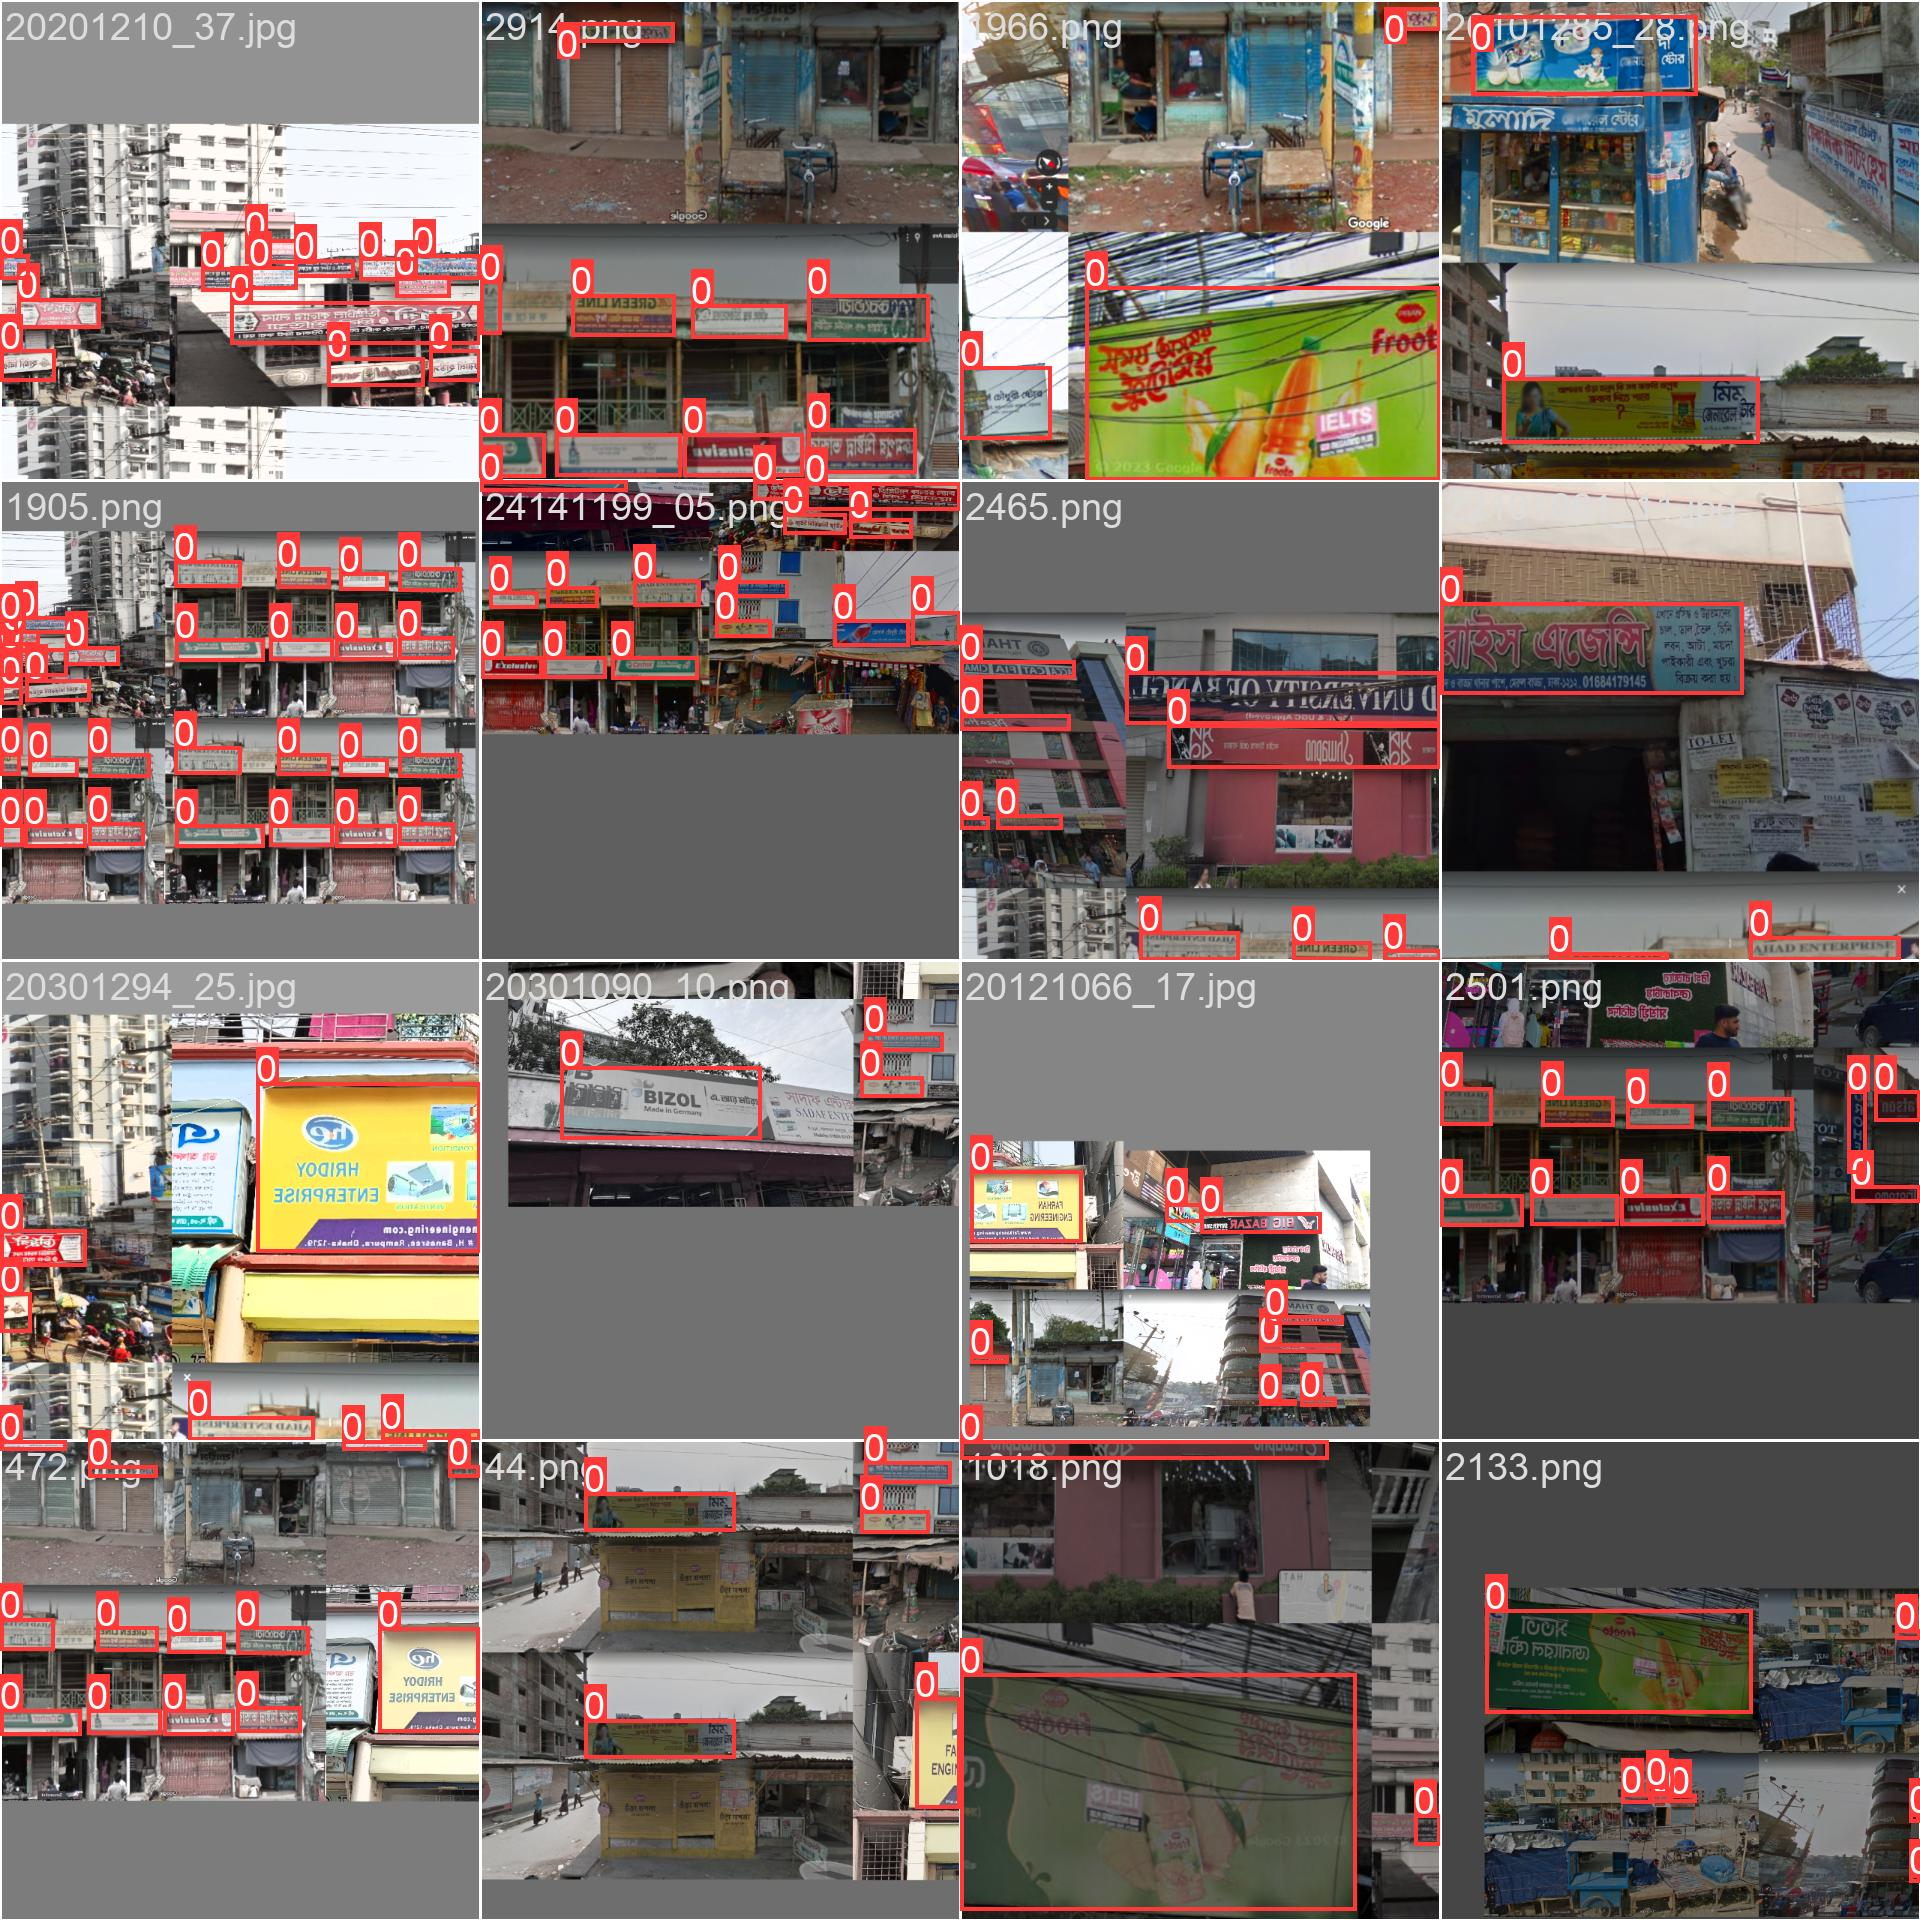

In [14]:
Image(filename='runs/detect/train/train_batch1.jpg', width=1000)

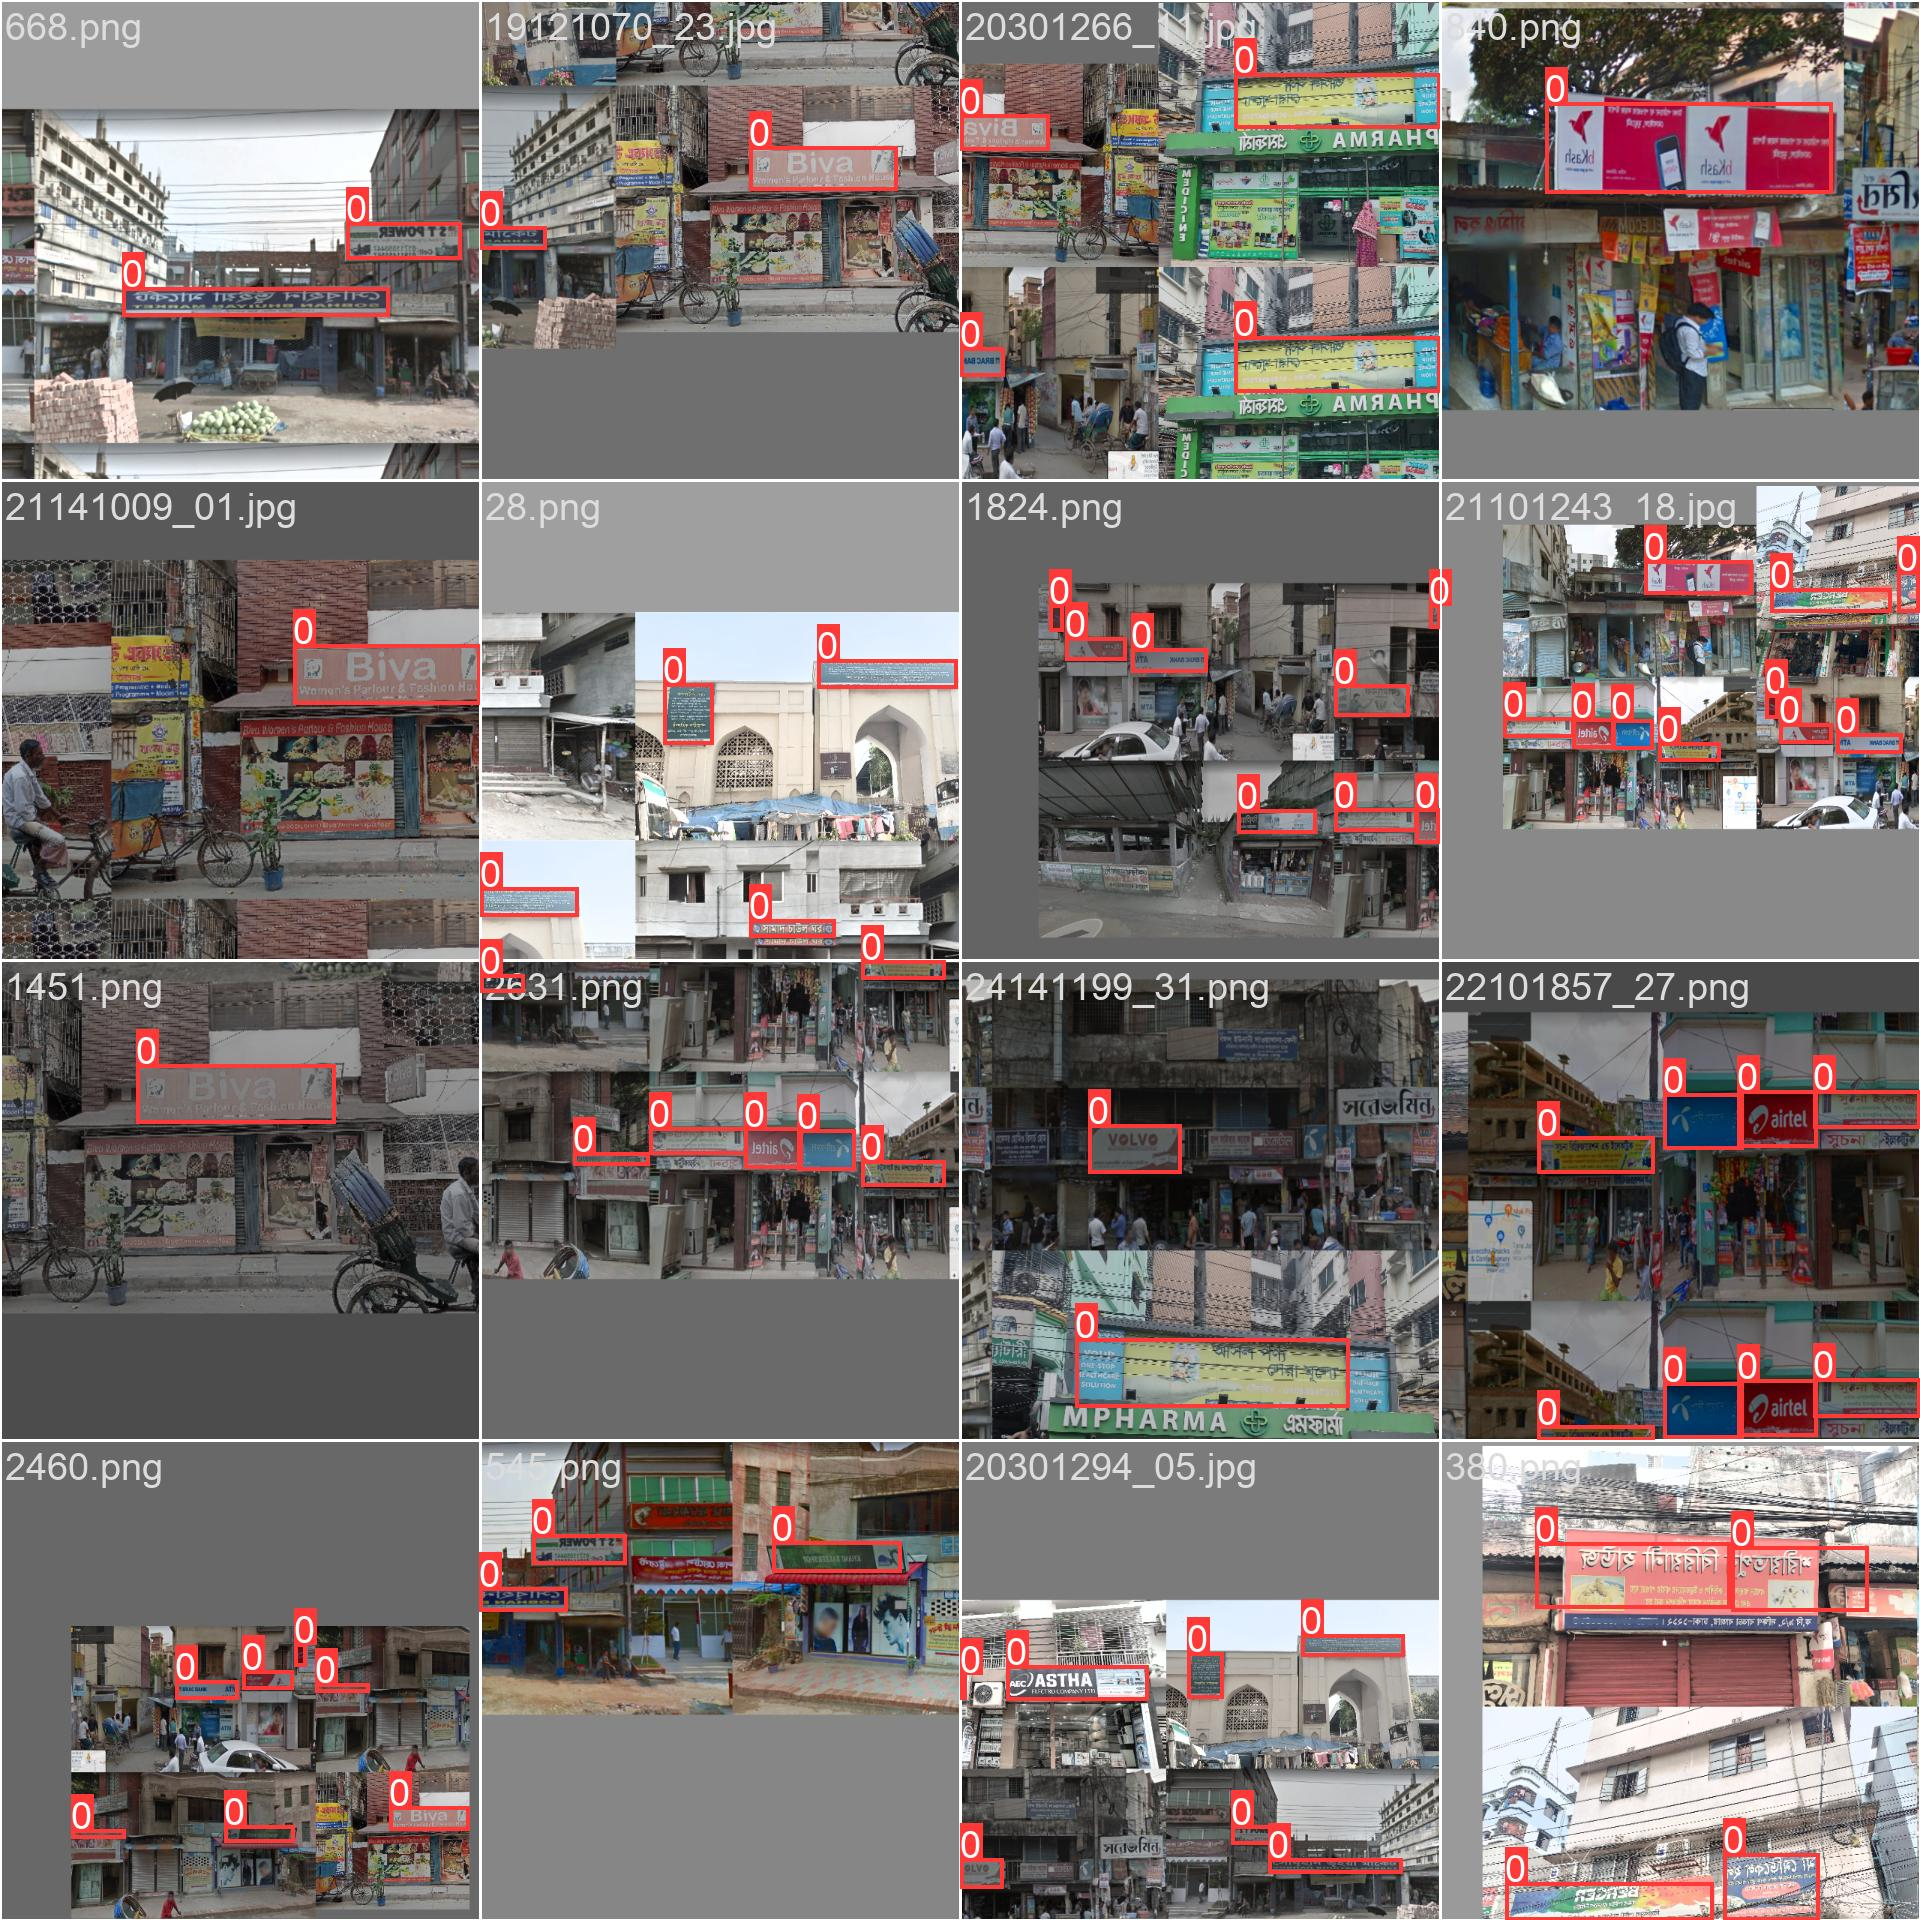

In [15]:
Image(filename='runs/detect/train/train_batch2.jpg', width=1000)

# **Validation**

In [16]:
#!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

model = YOLO("runs/detect/train/weights/best.pt")
model.val(data = 'data.yaml', imgsz = 640, batch = 30, conf = 0.6, iou = 0.7, device = 0, plots = True, save = True)

Ultralytics YOLOv8.2.2  Python-3.12.2 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients


val: Scanning C:\Users\Rizvi\Desktop\Milestone_2\data\labels\val.cache... 723 images, 2 backgrounds, 11 corrupt: 100%|██████████| 723/723 [00:00<?, ?it/s]

val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\24141199_23.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0022]
val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\2968.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\2970.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\2973.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
val: WARNING  C:\Users\Rizvi\Desktop\Milestone_2\data\images\val\2980.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     2.4172      3.0767      2.5756      1.5525]
val: WARNING  C:\Users\Rizvi\Deskt


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/24 [00:00<?, ?it/s]c:\Python312\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.69it/s]


                   all        712       1586      0.757      0.718      0.748      0.599
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000213D2D7FF20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

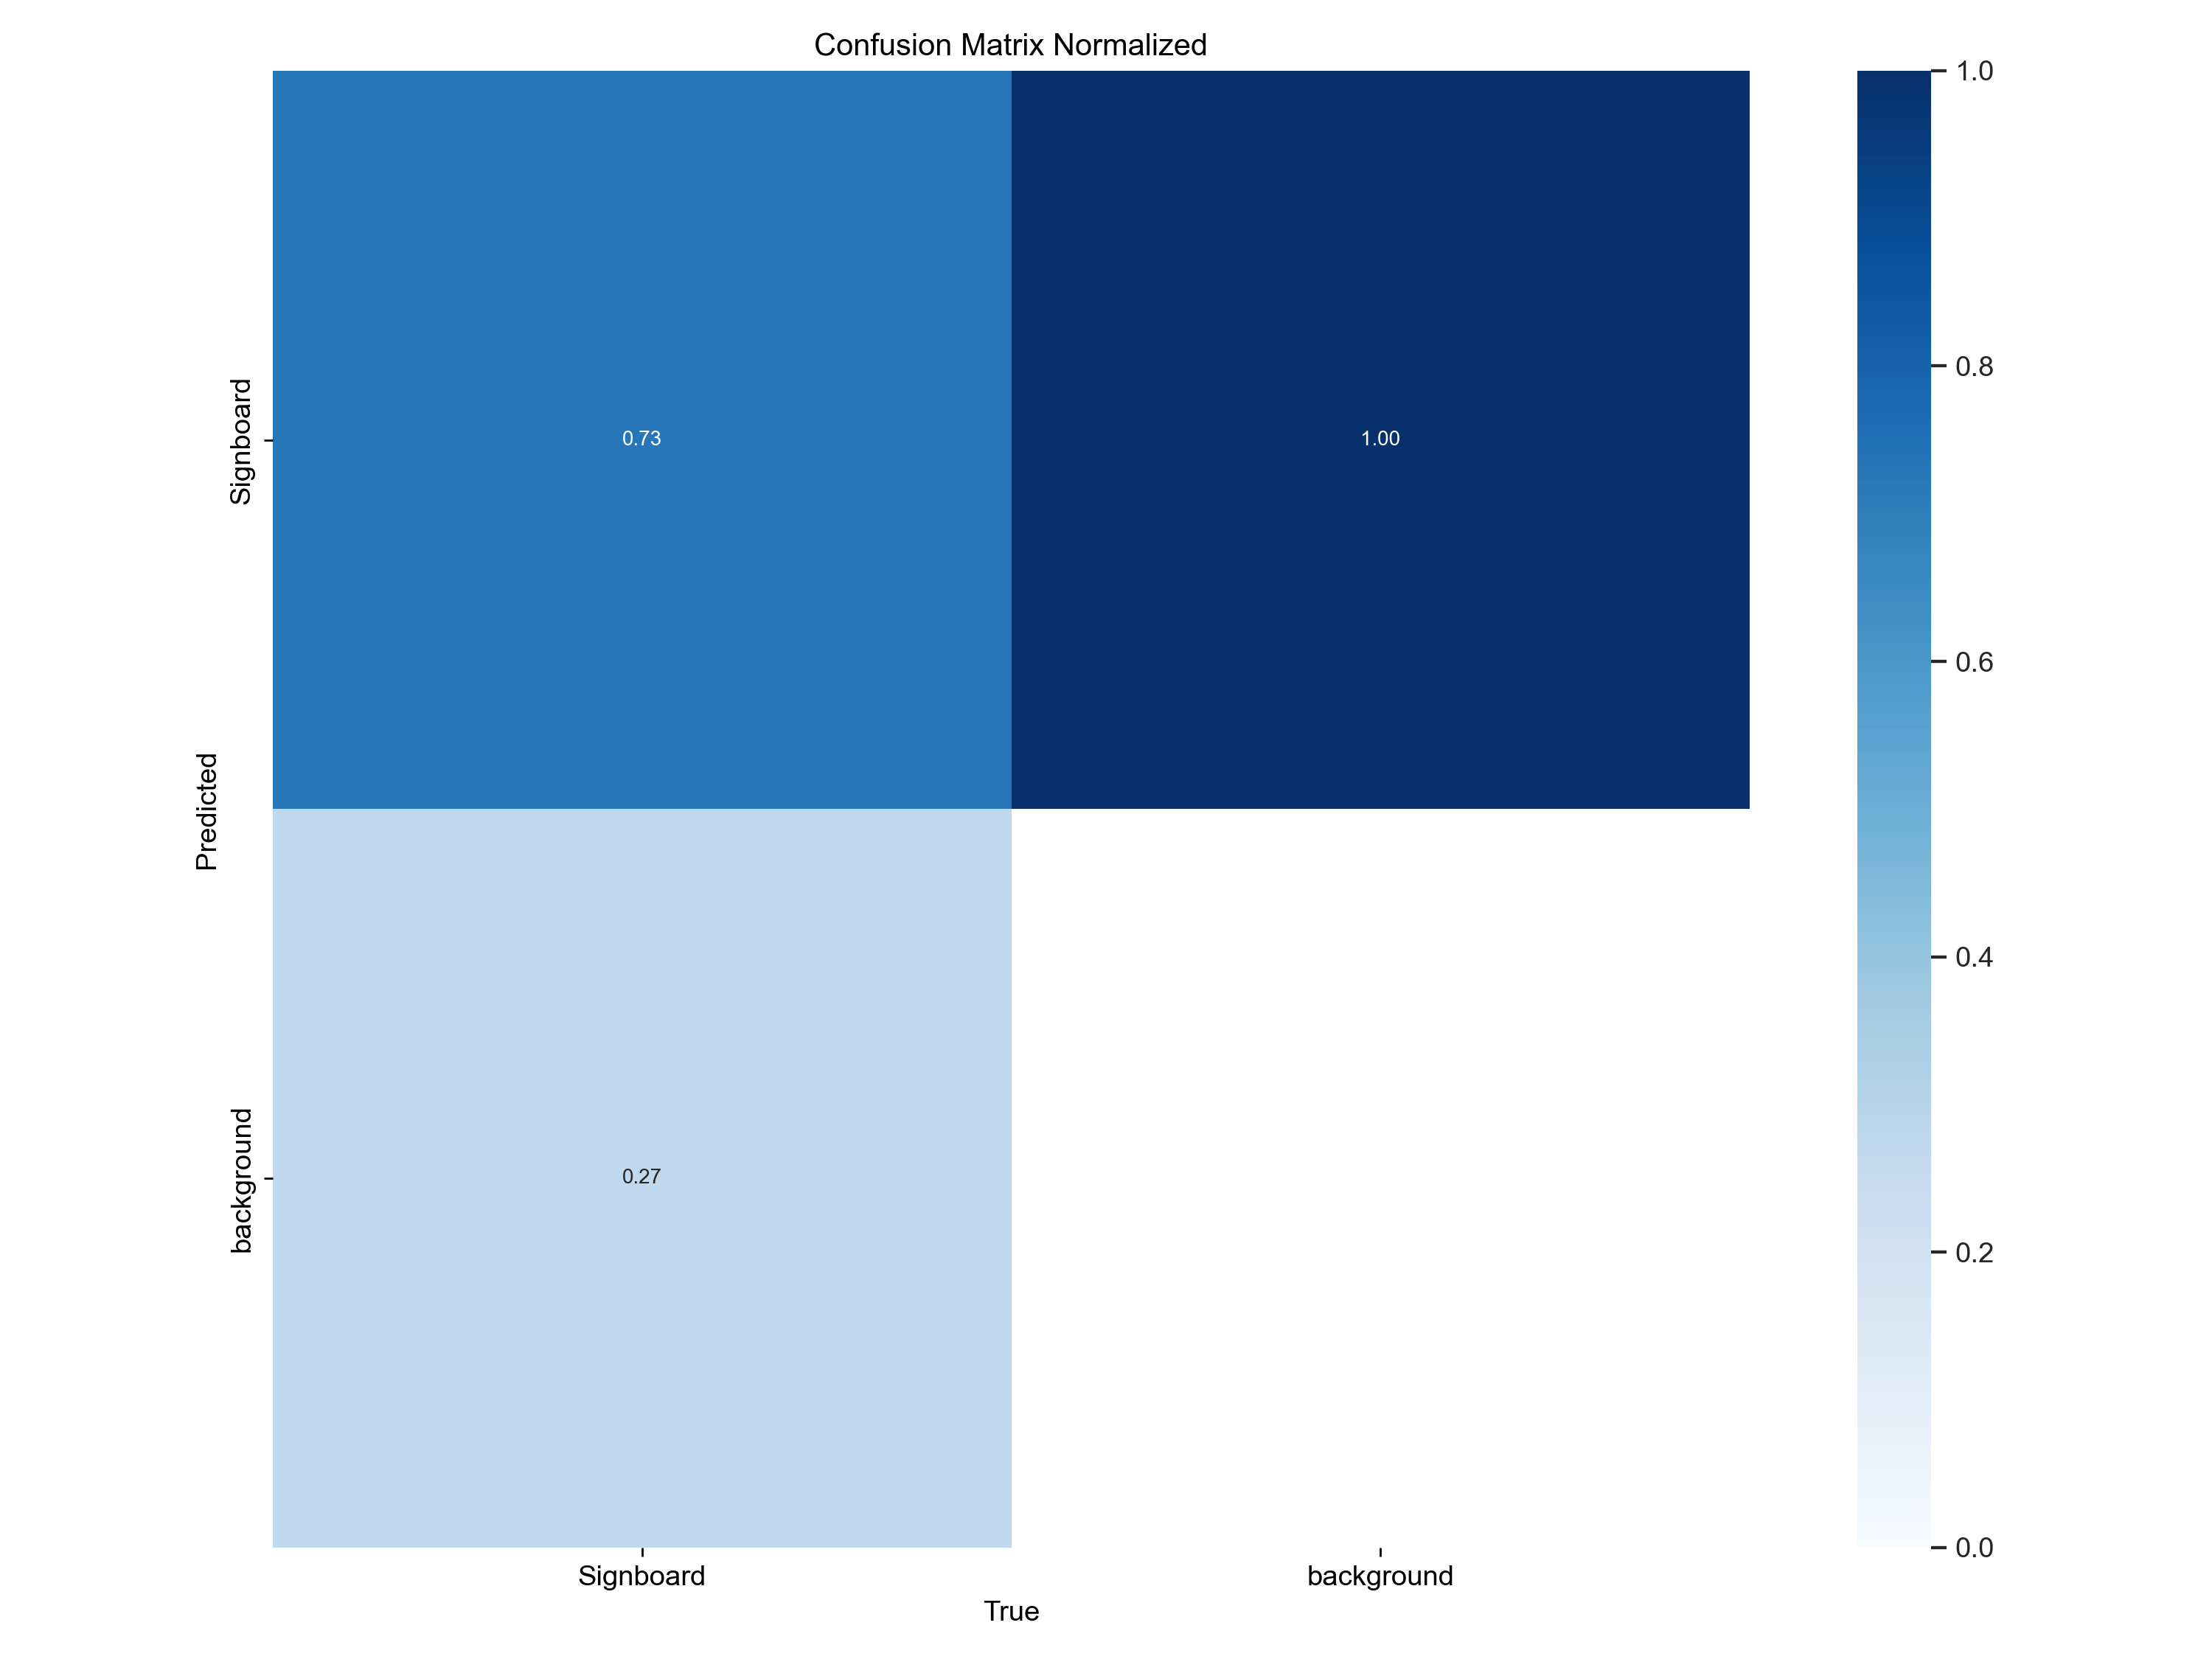

In [17]:
Image(filename='runs/detect/val/confusion_matrix_normalized.png', width=1000)

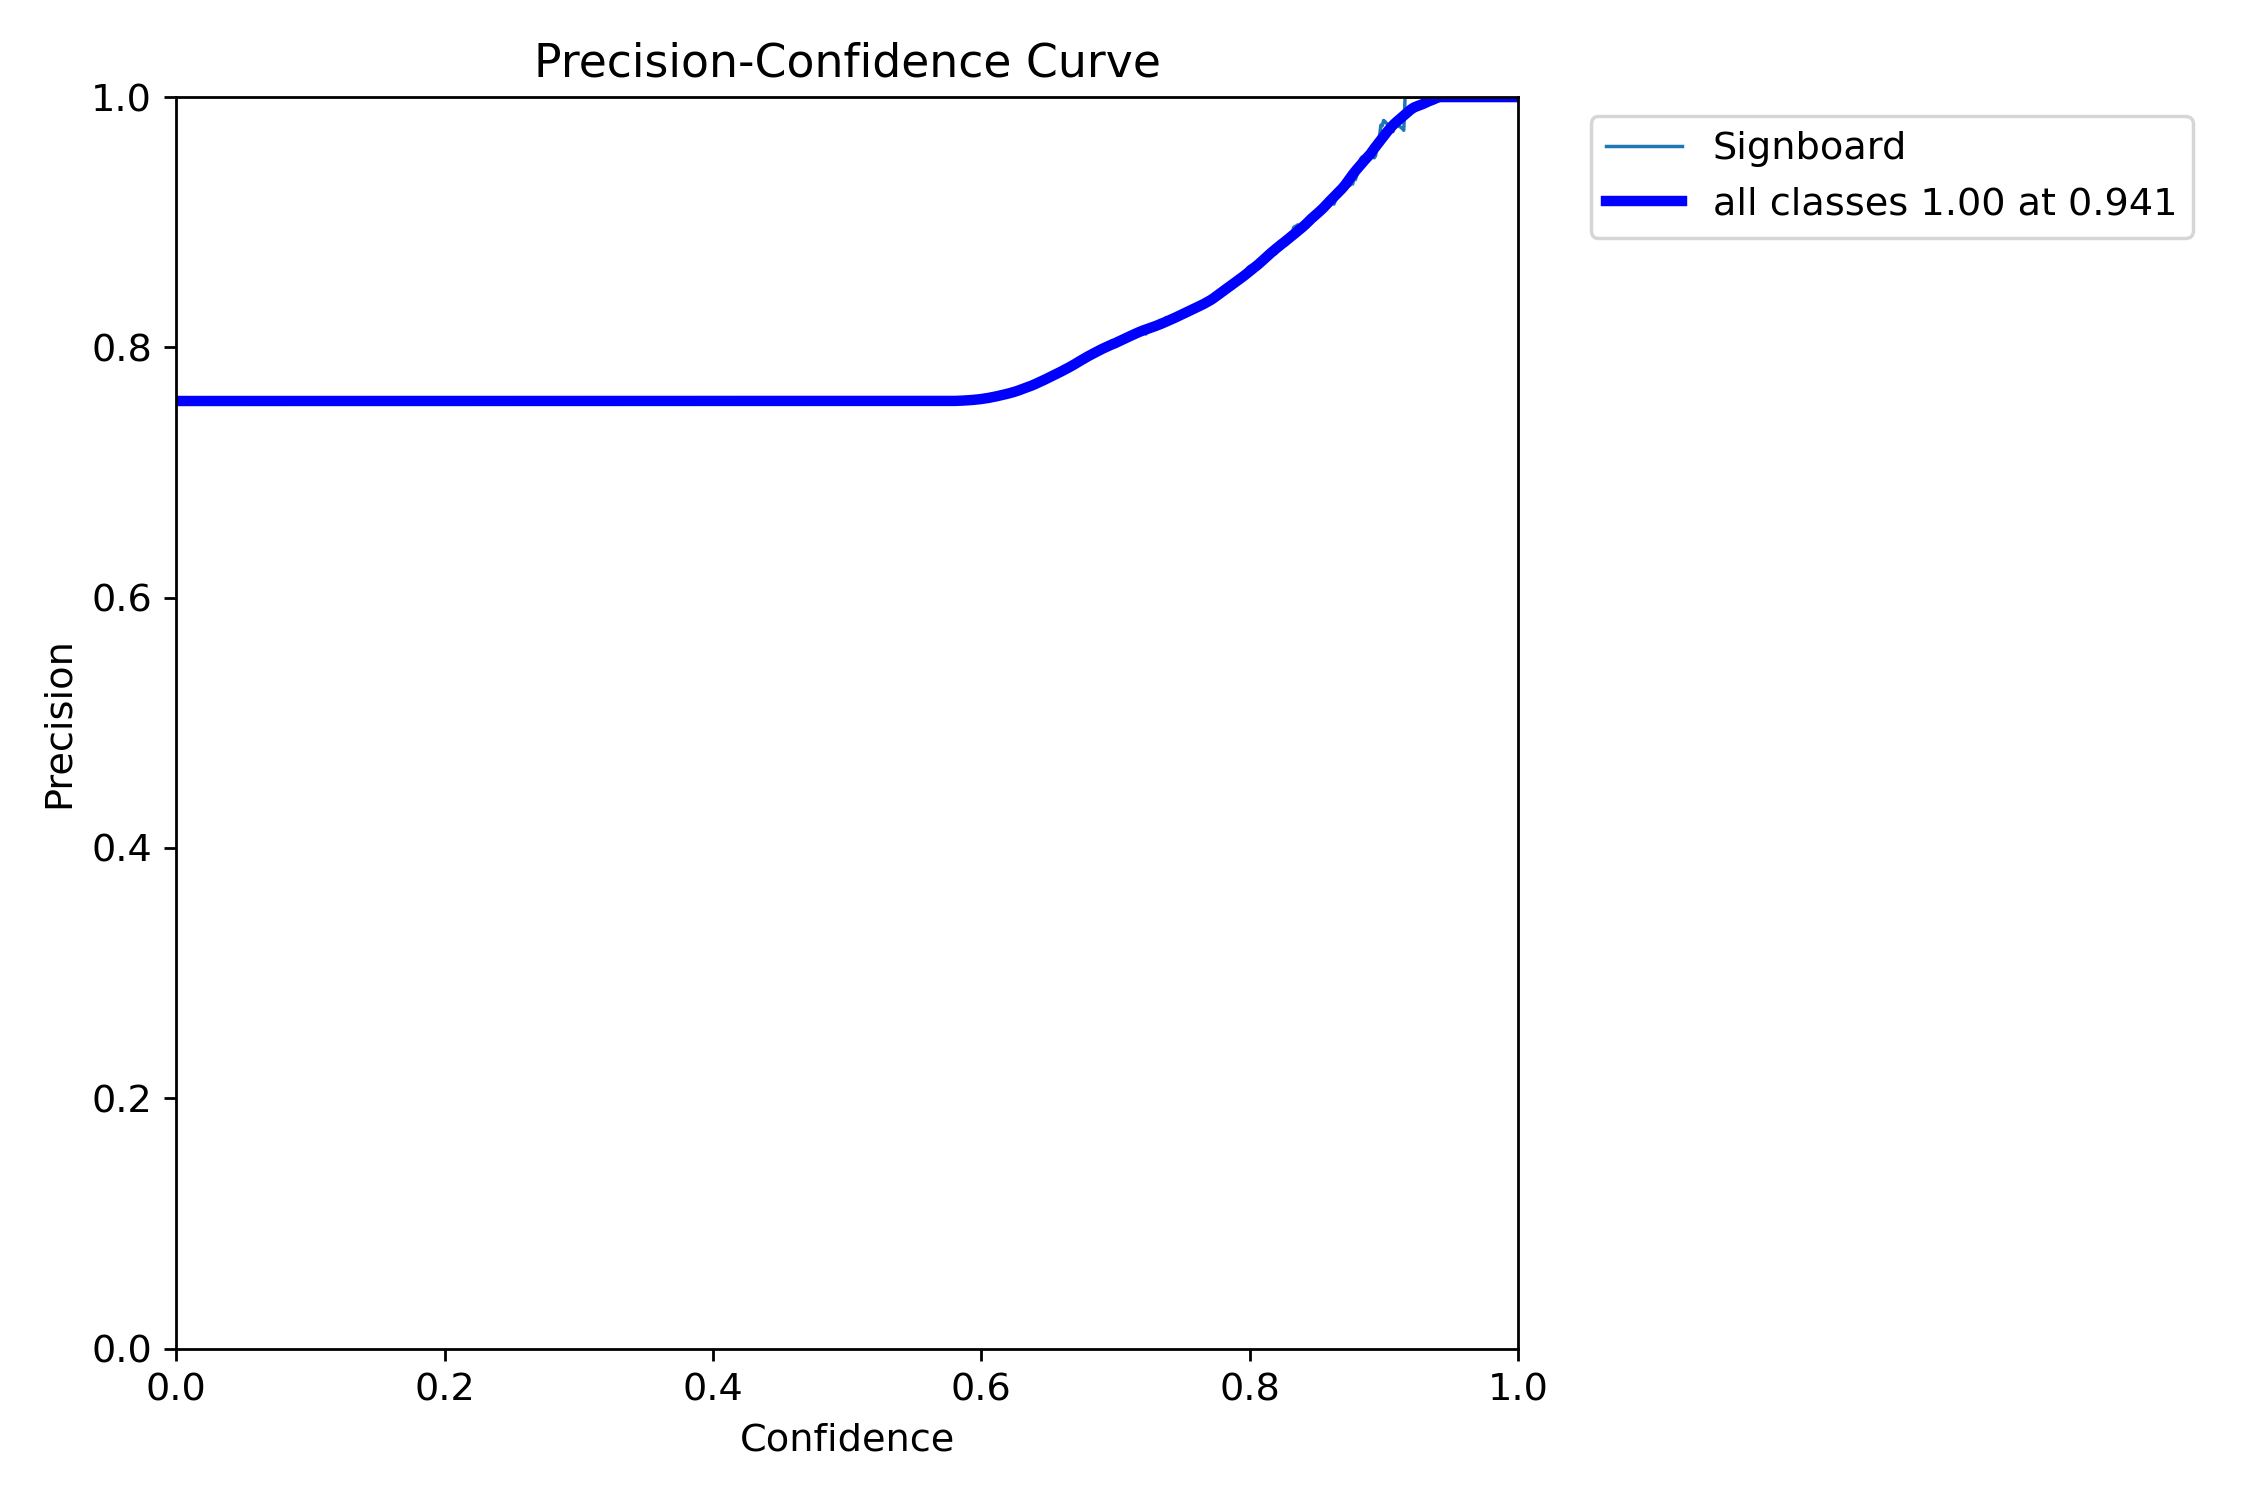

In [18]:
Image(filename='runs/detect/val/P_curve.png', width=1000)

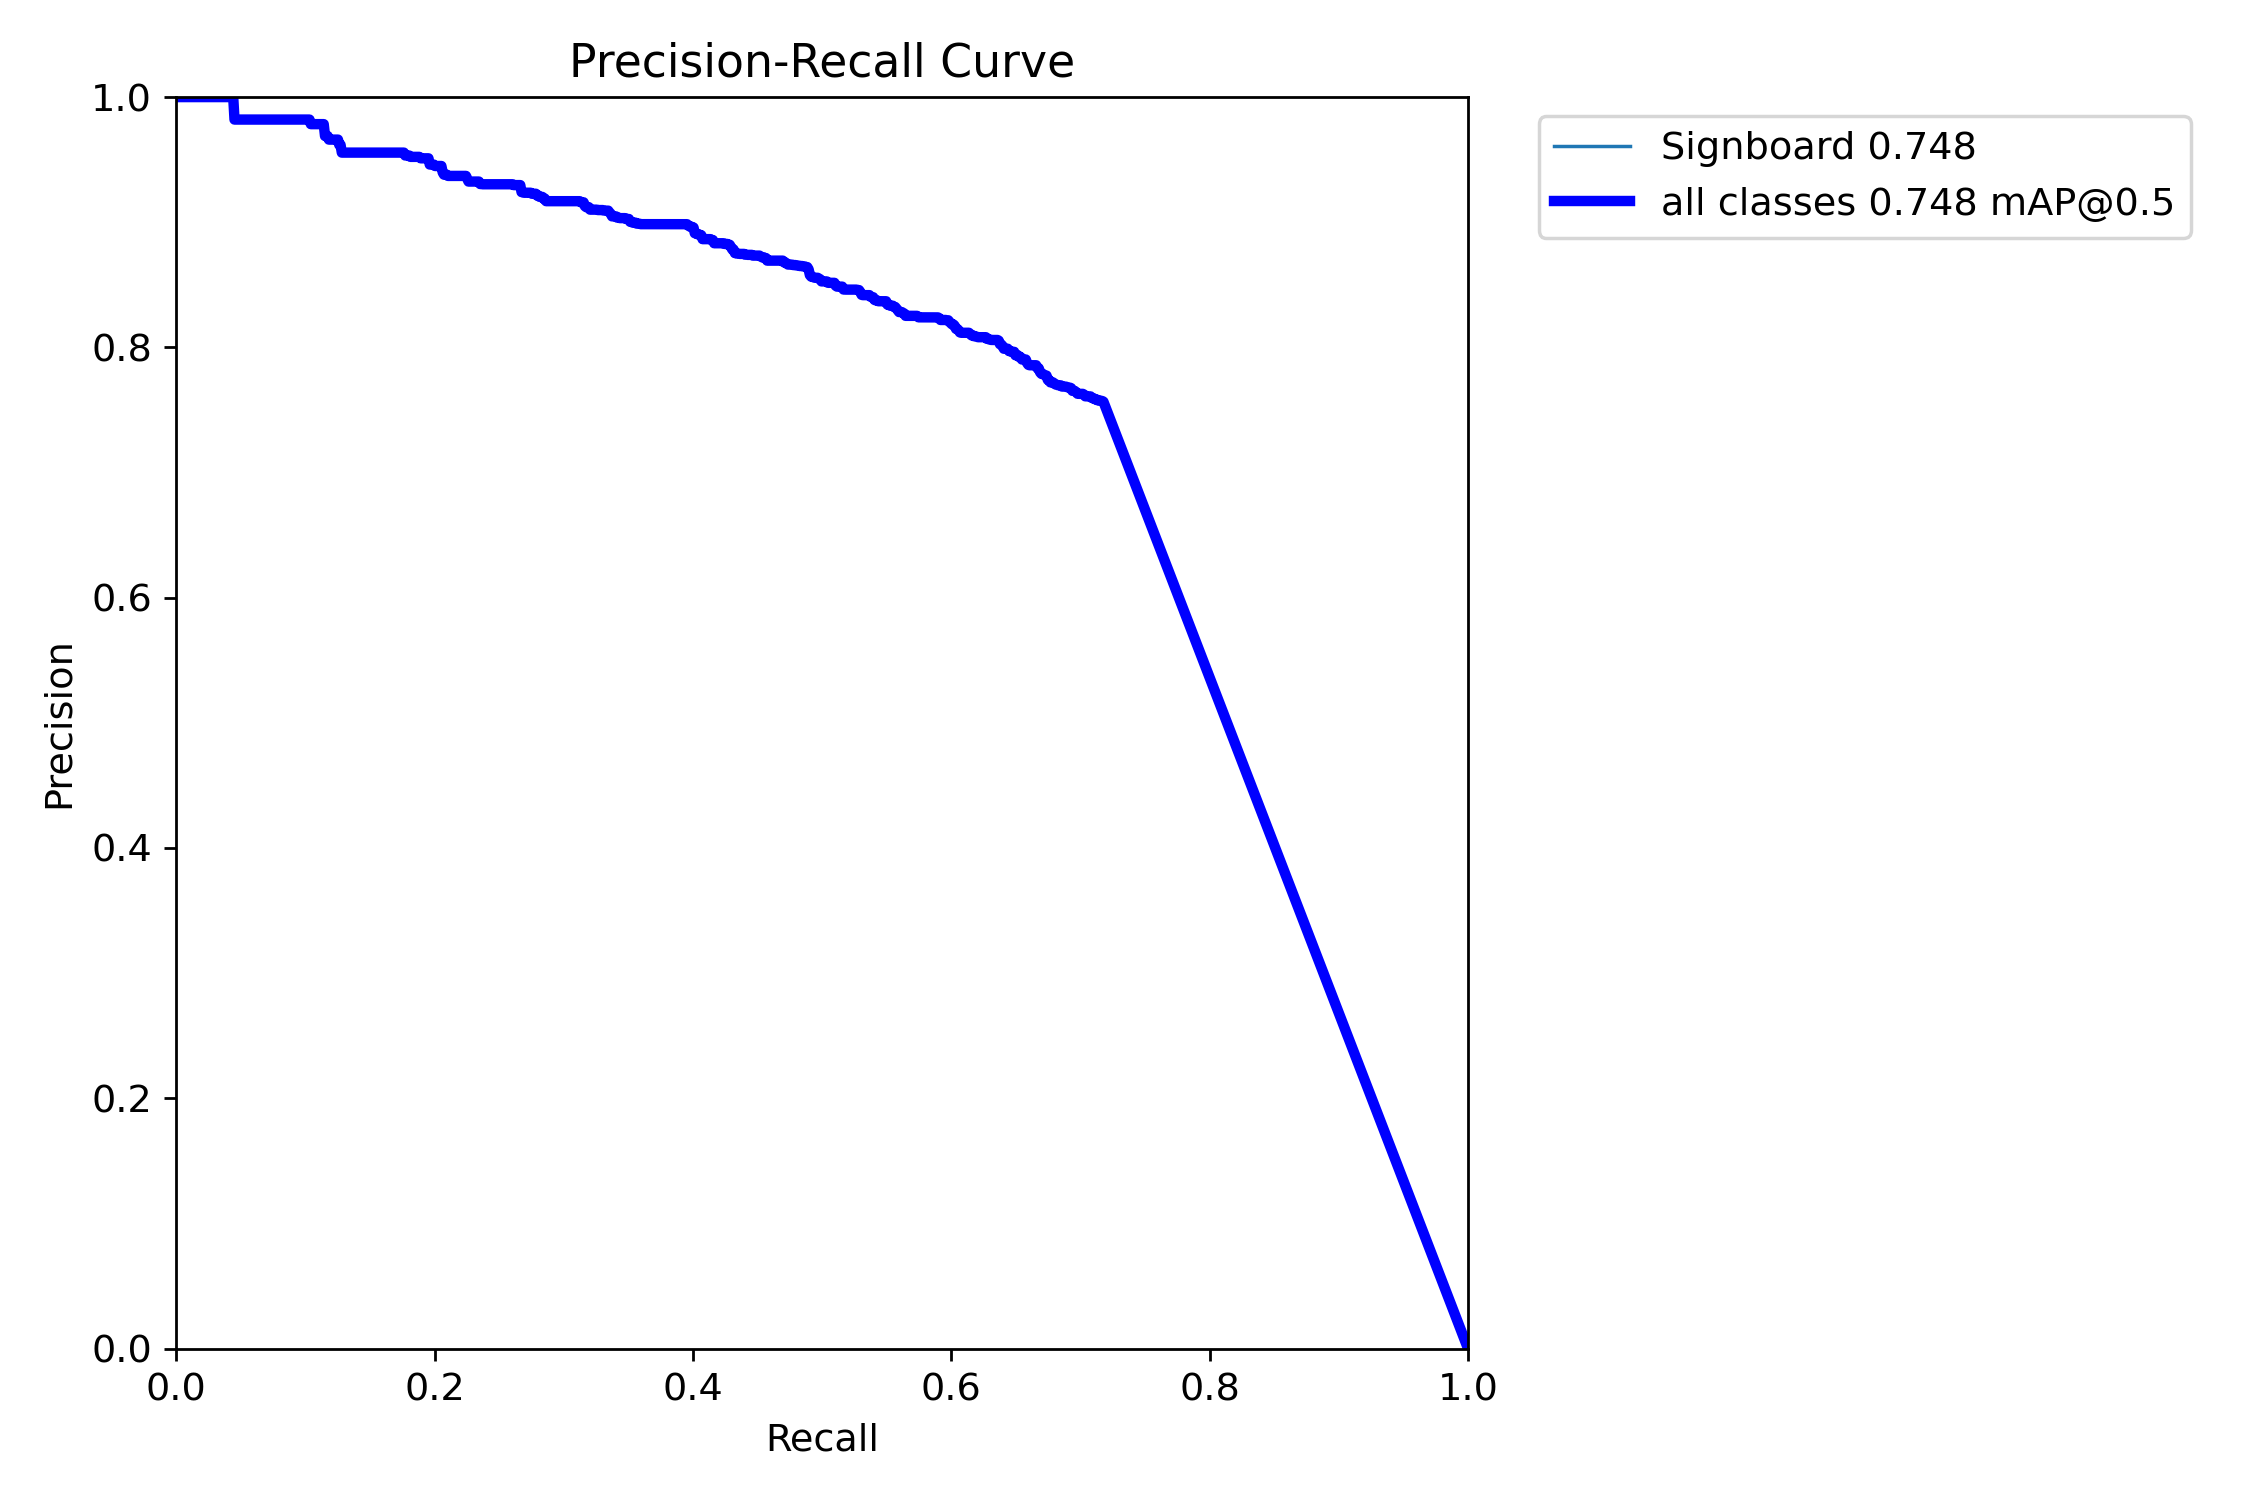

In [19]:
Image(filename='runs/detect/val/PR_curve.png', width=1000)

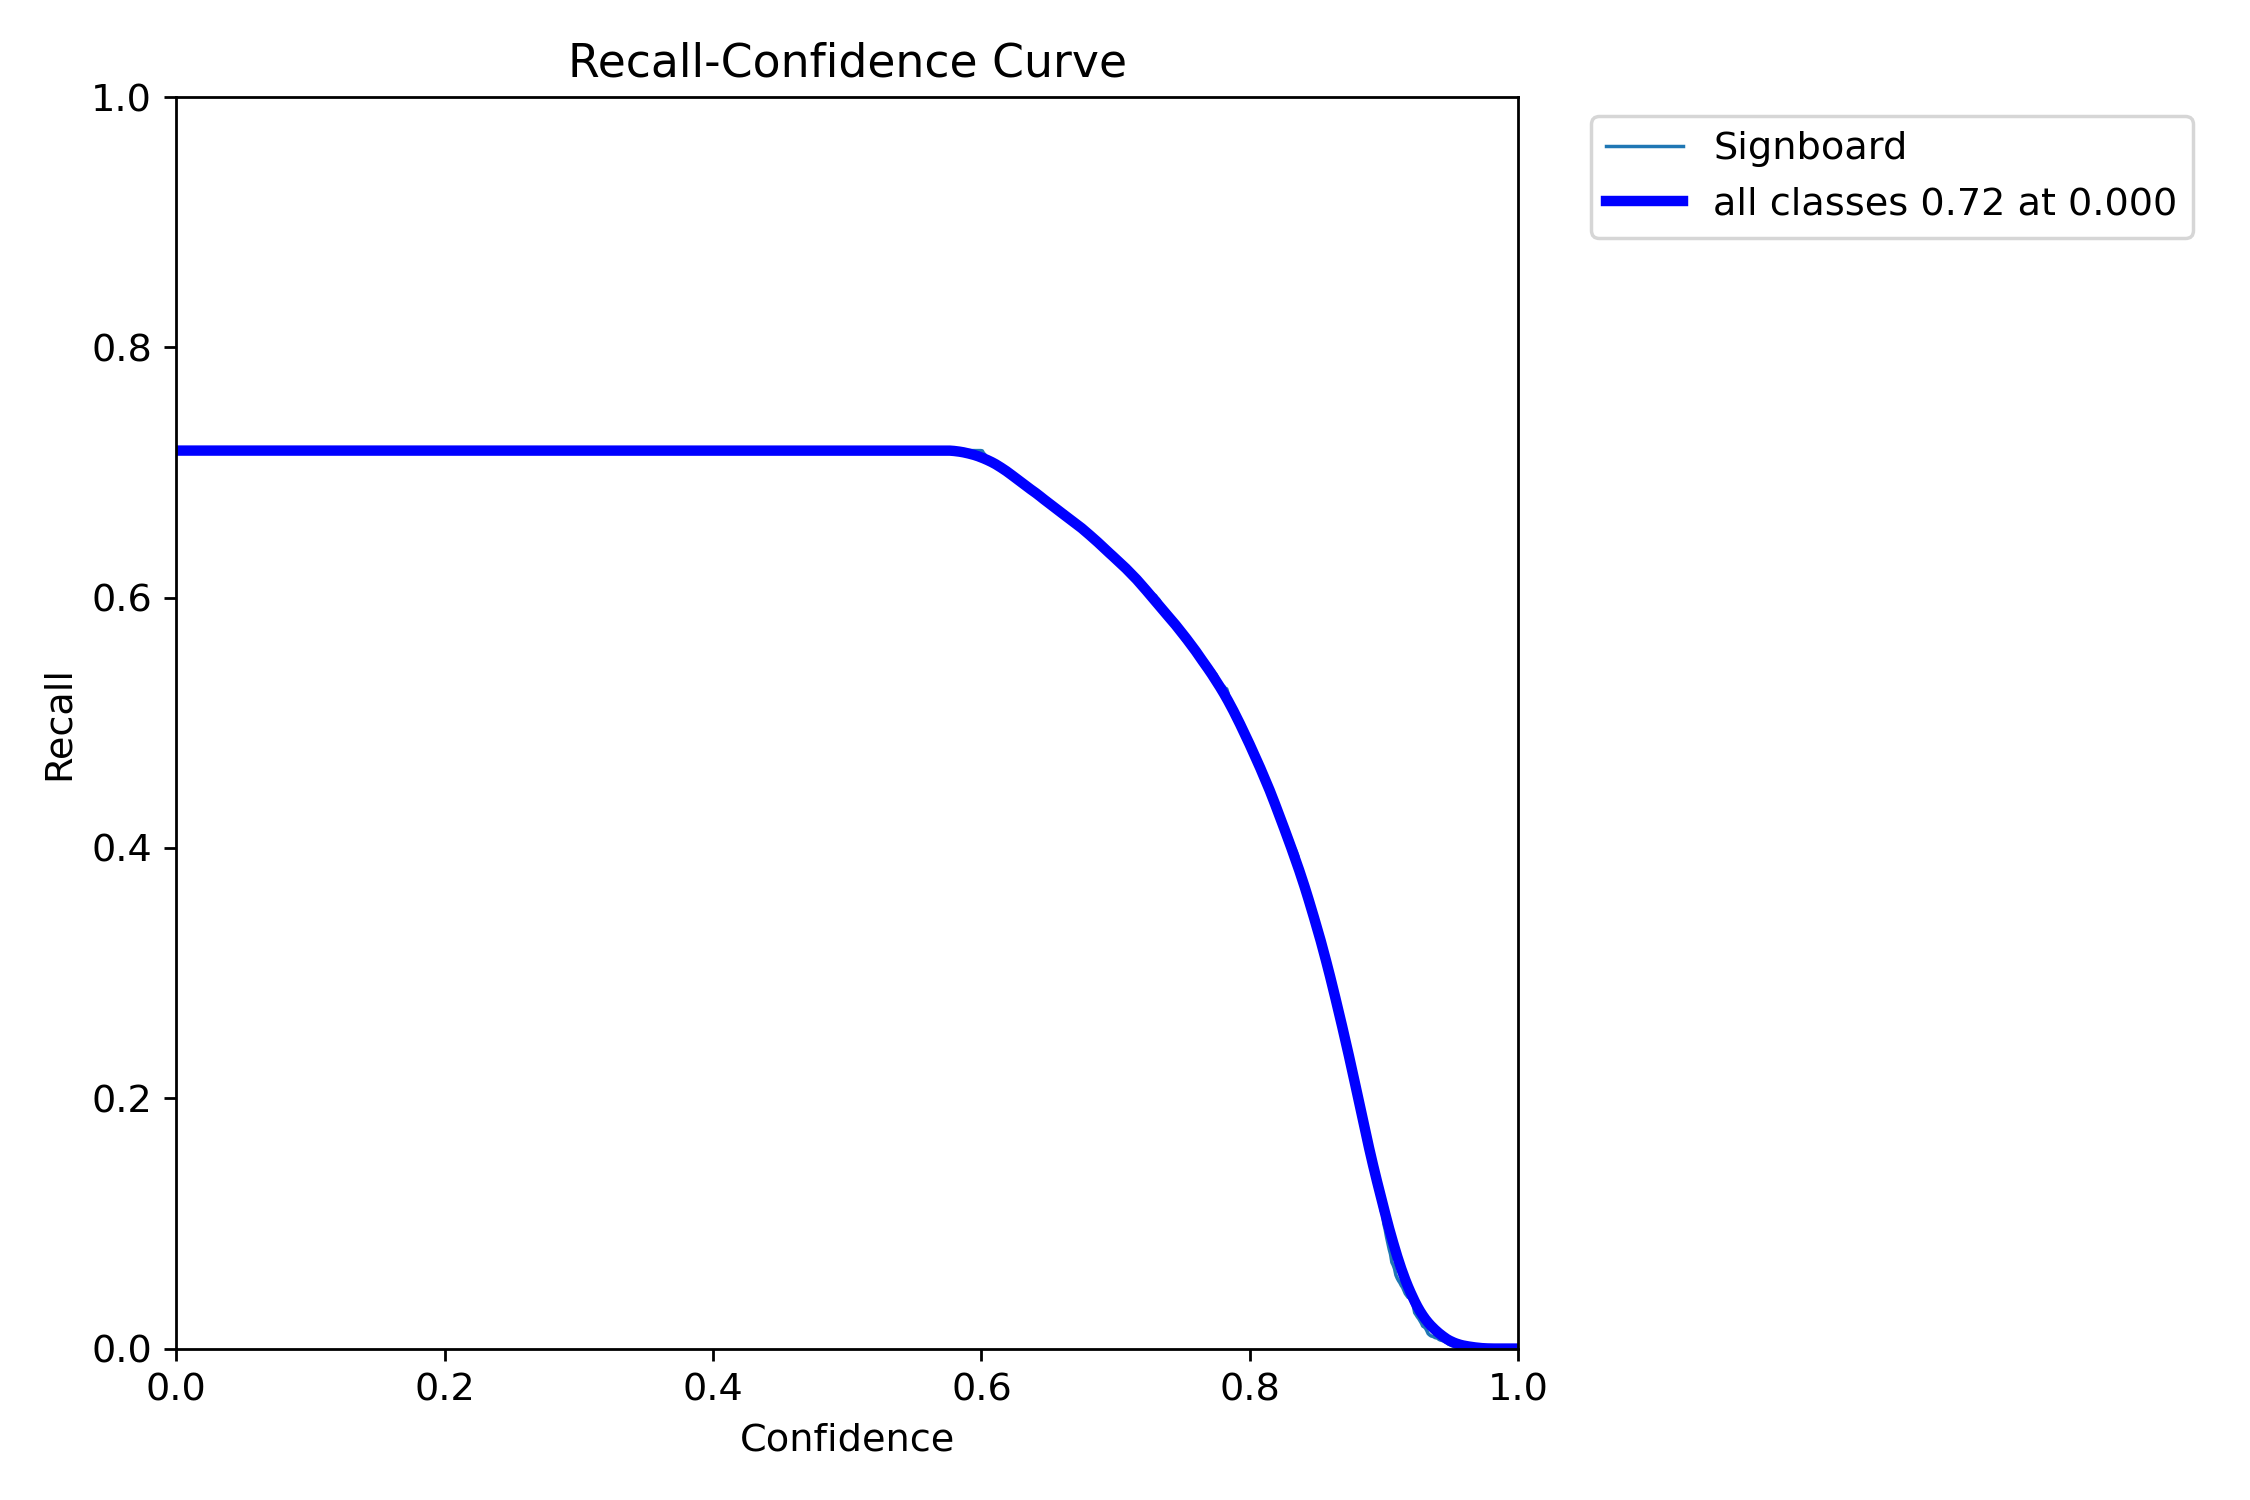

In [20]:
Image(filename='runs/detect/val/R_curve.png', width=1000)

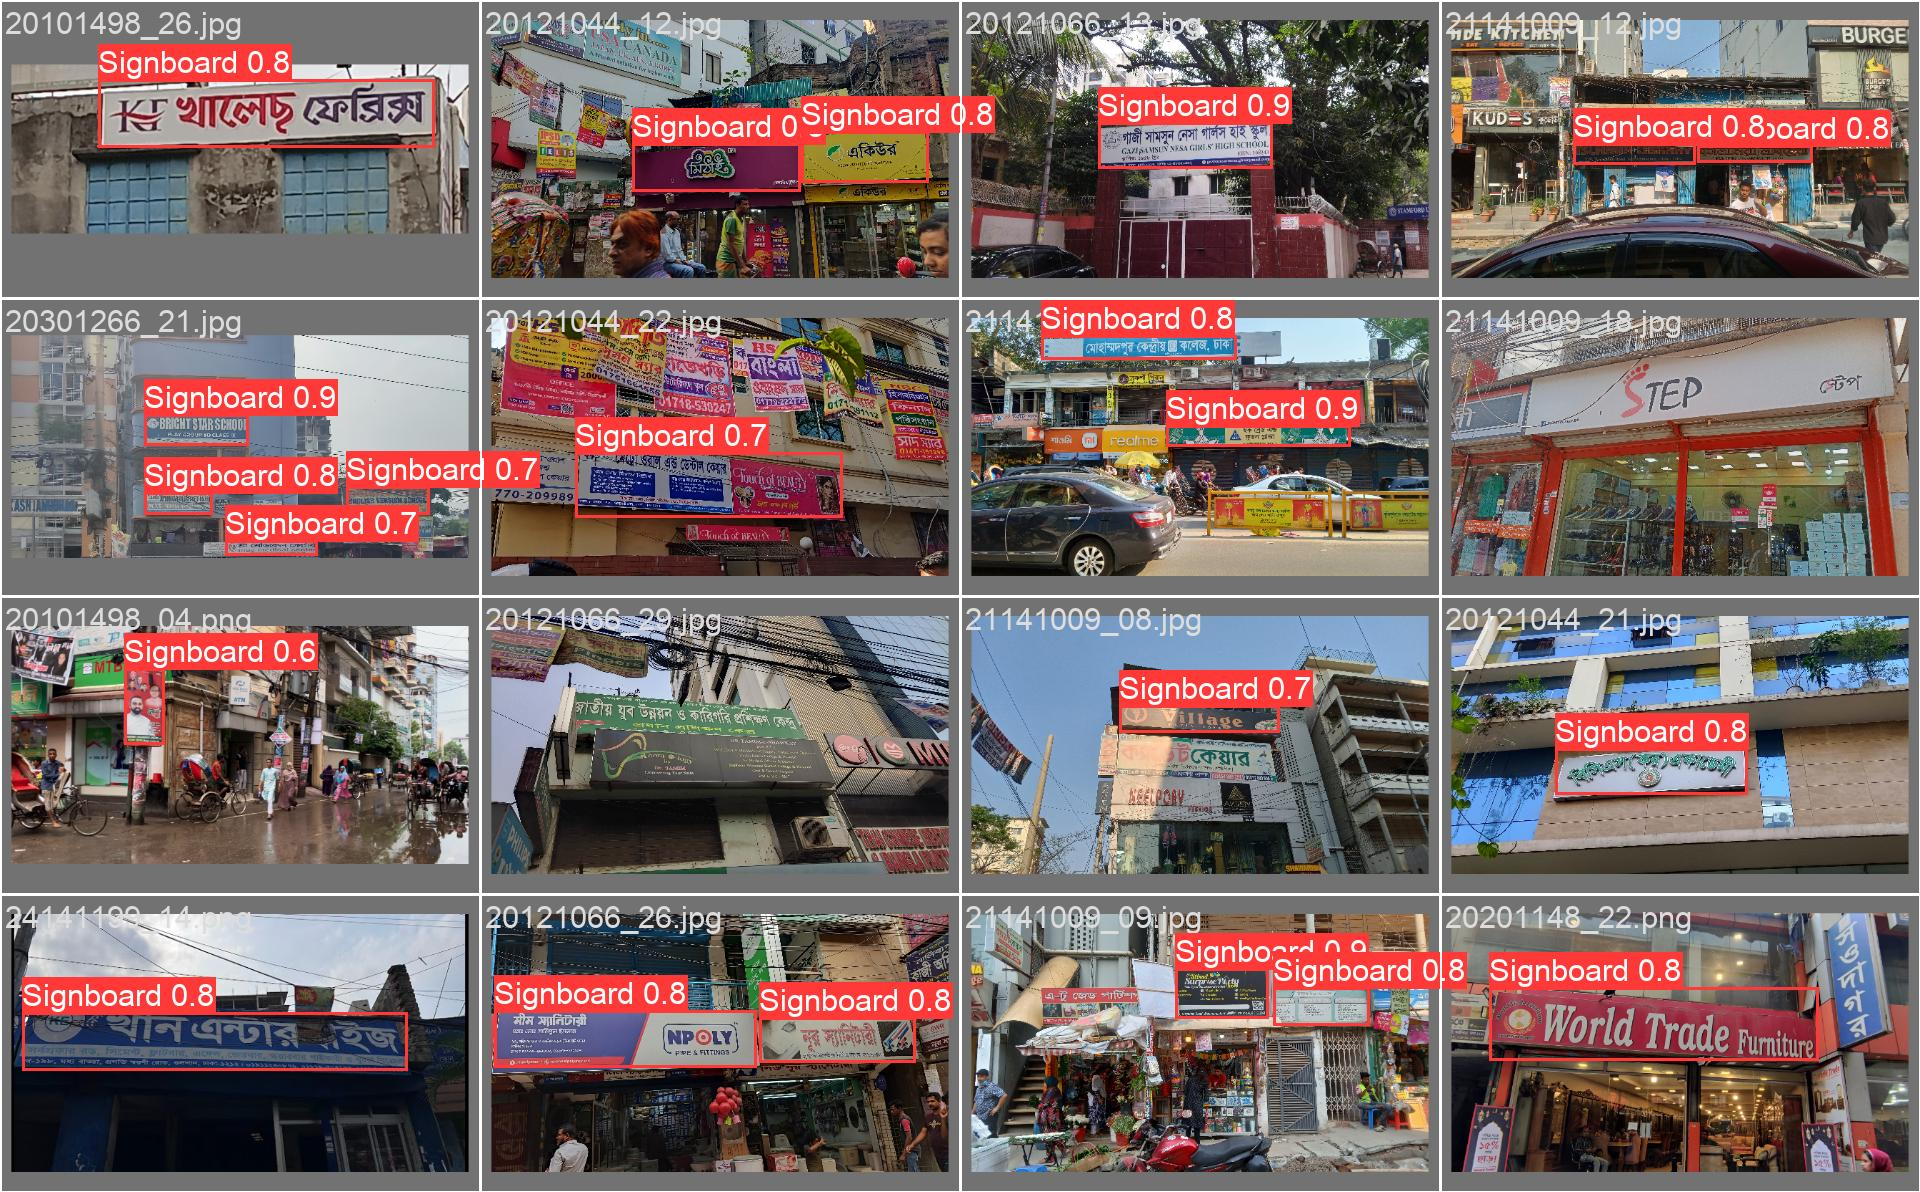

In [21]:
Image(filename='runs/detect/val/val_batch0_pred.jpg', width=1000)

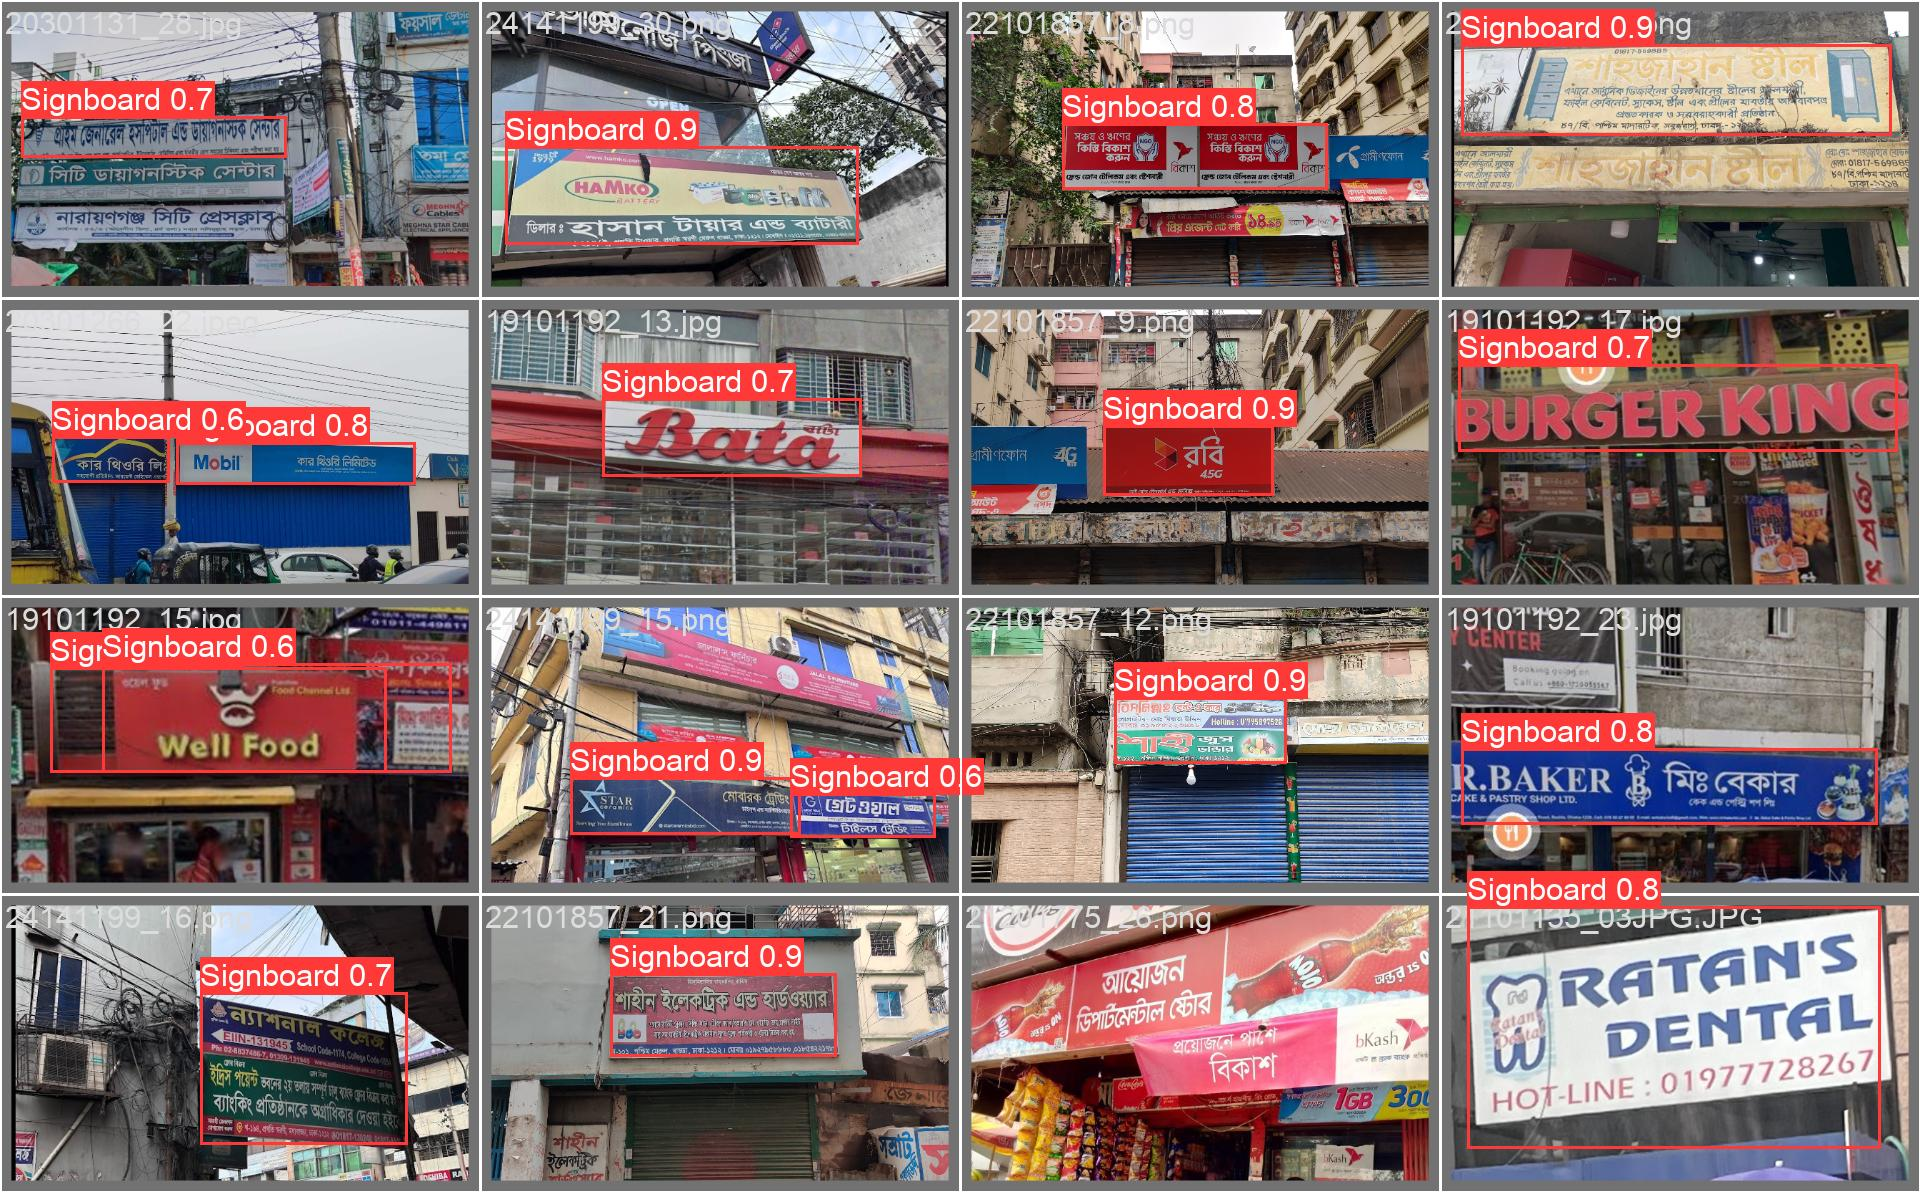

In [22]:
Image(filename='runs/detect/val/val_batch1_pred.jpg', width=1000)

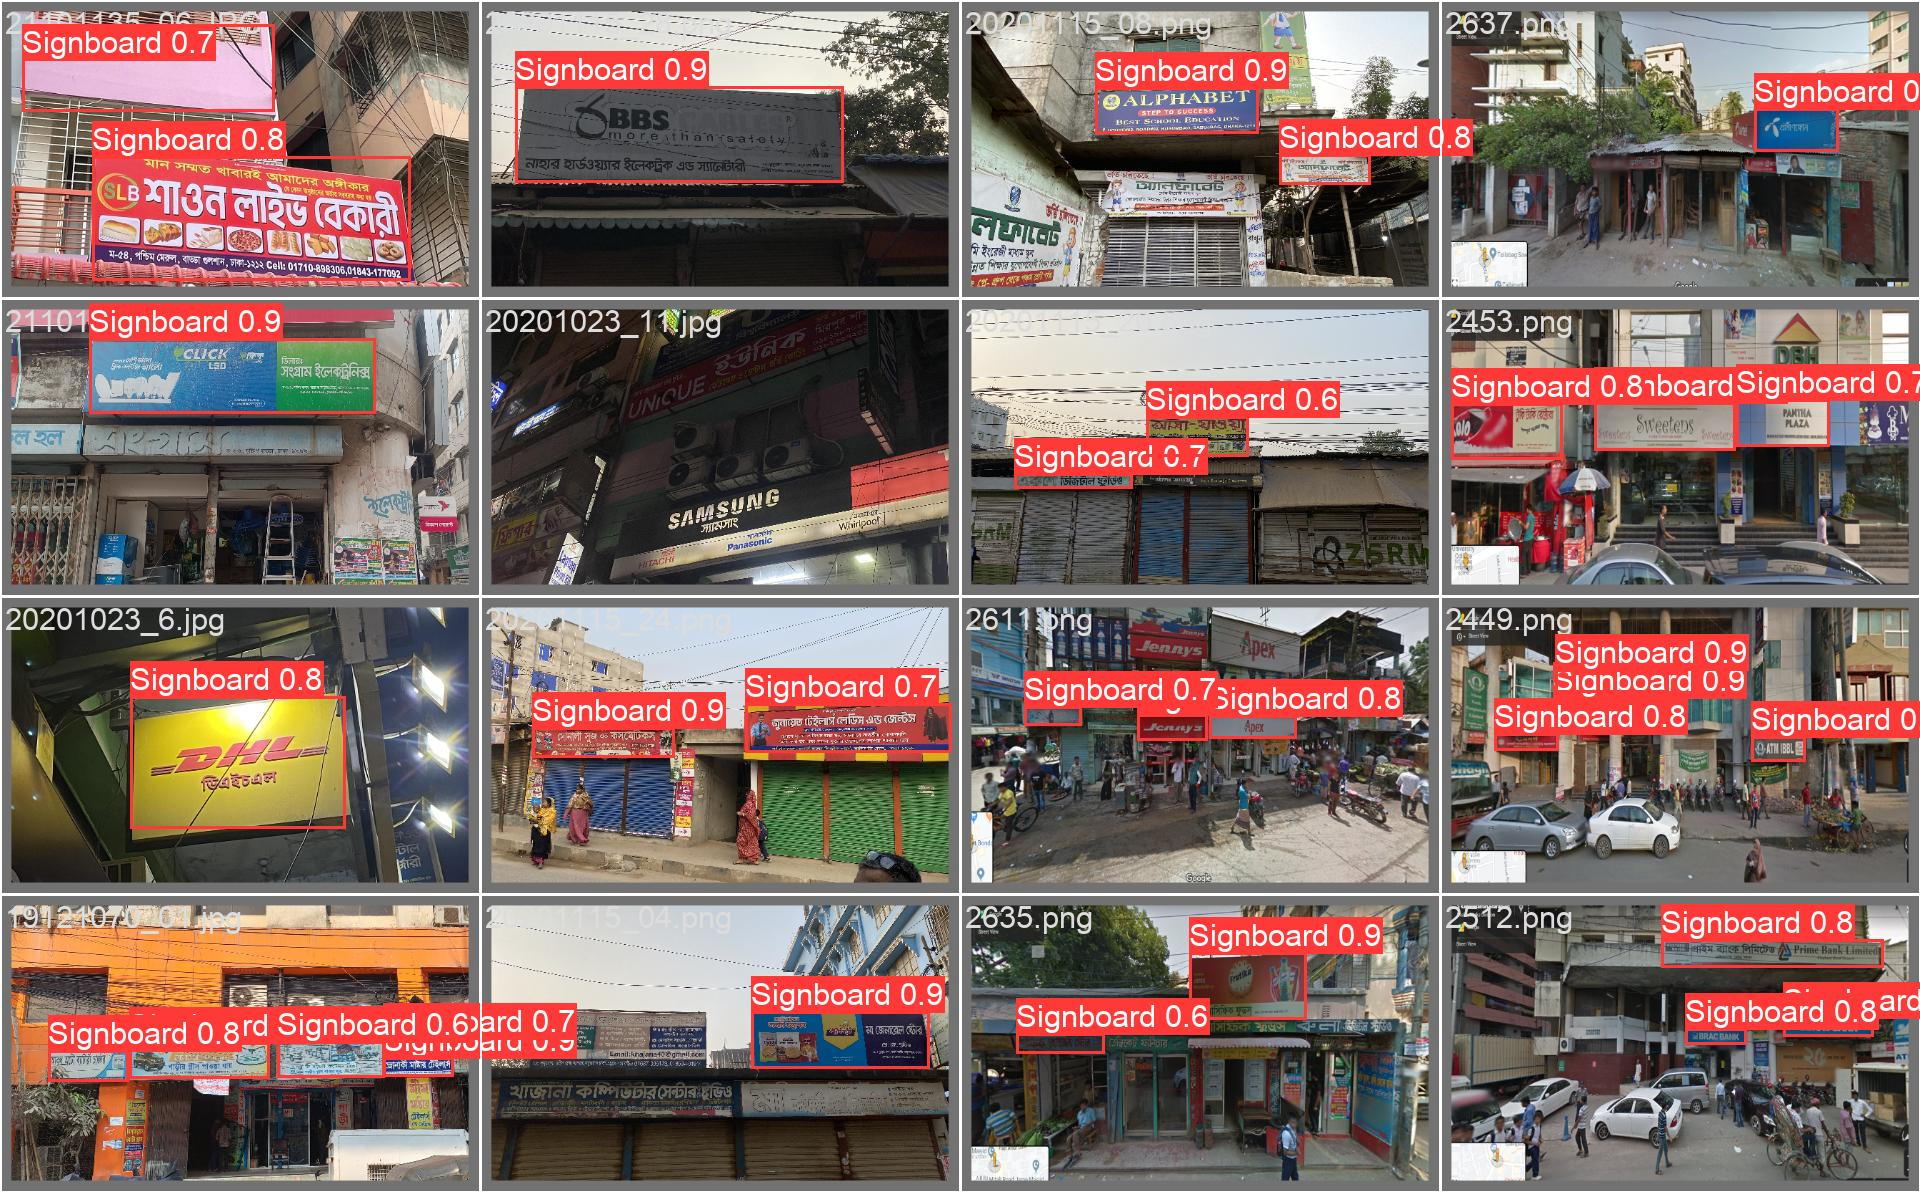

In [23]:
Image(filename='runs/detect/val/val_batch2_pred.jpg', width=1000)

# **Prediction**

In [4]:
#!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/images/test save=True   show_conf=True show_labels=True show_boxes=True

model = YOLO("weights/best.pt")
model.predict(data = 'data.yaml', imgsz = 640, batch = 30, conf = 0.6, source = "data/images/test", iou = 0.7, plots = True, save = True)



image 1/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\1023.png: 640x640 2 Signboards, 558.6ms
image 2/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\1441.png: 640x640 2 Signboards, 558.6ms
image 3/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\1446.png: 640x640 5 Signboards, 558.6ms
image 4/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\1452.png: 640x640 2 Signboards, 558.6ms
image 5/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\1455.png: 640x640 2 Signboards, 558.6ms
image 6/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\1457.png: 640x640 3 Signboards, 558.6ms
image 7/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\1470.png: 640x640 1 Signboard, 558.6ms
image 8/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\1474.png: 640x640 1 Signboard, 558.6ms
image 9/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\1478.png: 640x640 3 Signboards, 558.6ms
image 10/362 c:\Users\Rizvi\Desktop\Milestone_2\data\images\test\

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Signboard'}
 obb: None
 orig_img: array([[[196, 191, 190],
         [196, 191, 190],
         [196, 191, 190],
         ...,
         [187, 181, 176],
         [188, 182, 174],
         [191, 183, 173]],
 
        [[196, 191, 190],
         [196, 191, 190],
         [196, 191, 190],
         ...,
         [187, 180, 173],
         [186, 182, 173],
         [187, 182, 173]],
 
        [[196, 191, 190],
         [196, 191, 190],
         [196, 191, 190],
         ...,
         [189, 181, 170],
         [188, 183, 170],
         [188, 182, 173]],
 
        ...,
 
        [[223, 217, 212],
         [240, 236, 233],
         [223, 217, 212],
         ...,
         [156, 160, 165],
         [154, 158, 163],
         [153, 157, 162]],
 
        [[209, 207, 198],
         [255, 255, 255],
         [241, 236, 234],
         ...,
         [156, 

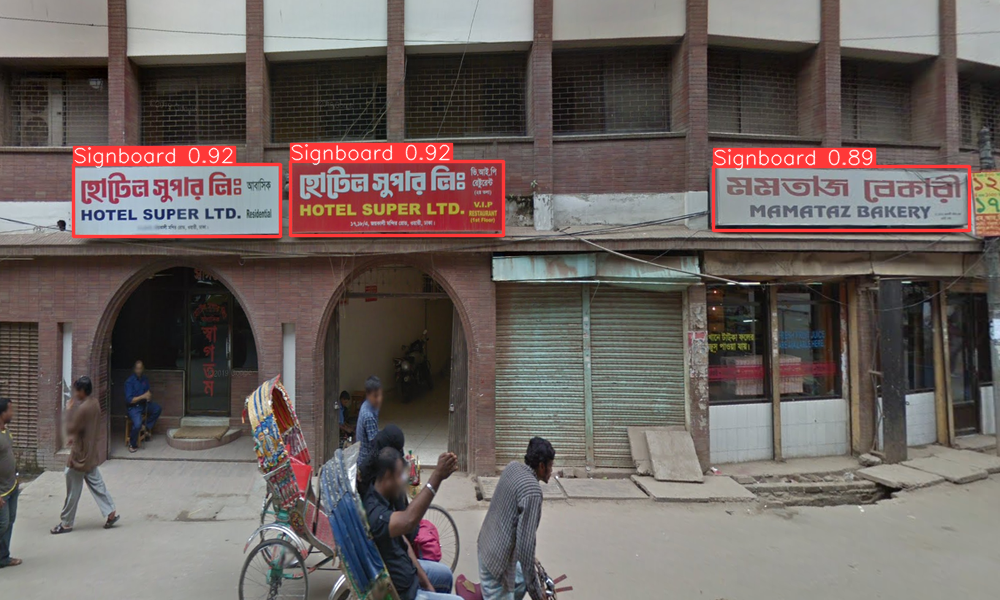

In [25]:
Image(filename='runs/detect/predict/2703.png', width=1000)

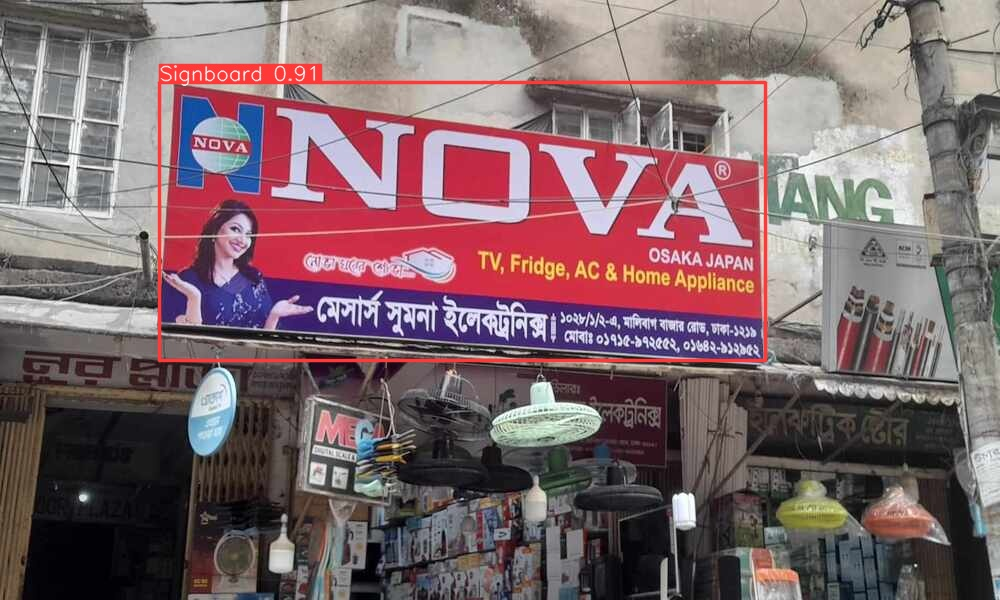

In [26]:
Image(filename='runs/detect/predict/ID_34.jpg', width=1000)